# MSDS692 - Data Science Practicum

## Introduction

The City of Los Angeles is the most populous city in California and the second most populous city in the United States after New York City. Los Angeles is home to some 3.8 million residents know as Angelinos. The city is known for its Mediterranean climate, ethnic diversity, Hollywood, the entertainment industry, and its sprawling metropolis. Los Angeles lies in a basin in Southern California, adjacent to the Pacific Ocean, with mountains as high as 10,000 feet (3,000 m), and deserts. The city, which covers about 469 square miles (1,210 km2), is the seat of Los Angeles County, the most populous county in the United States with over 10 million residents. This project will utilize crime data published by the Los Angeles Police Department from 2010 to present to predict crime events based on location, time, and victim demographics. The Los Angeles Police Department operational jurisdiction covers the City of Los Angeles as well as some unincorporated areas of Los Angeles County. 


## Project Summary
The purpose of this project is to utilize publicly available data, specifically crime data from the City of Los Angeles to predict the type of crime based on several features present in the LAPD crime data these include, area where the criminal offense occured, time of day, the modus operendi of the offender, age, sex, weapon types, location, and status of the case to name a few.  

## Project Tasks
The specific tasks associated with this project are designed to align with and adhere to the standard data science project lifecycle. The project will be initiated with the data collection phase and end with the primary model selection and analysis.  The specific project tasks are outlined in the Project Table of Contents section below. 
1.  Business Intelligence/Domain Knowledge
2.	Import ML Libraries
3.	Import Dataset
4.	Clean data: fix nulls, impute, structure
5.	Exploratory Data Analysis:
    (a)	Visually inspect 
    (b)	Analyze 
    (c)	Structure data
    (d)	Correlations
    (e)	Identify categorical data
6.	Baseline ML performance:
    (a)	Find categorical variables
    (b)	Structure data for ML algorithms
    (c)	Select Features and Targets
    (d)	Create test and training dataset
7.	Run Machine Learning Algorithms:
    (a)	Logistic Regression (move to semi-final)
    (b)	K-Nearest Neighbours
    (c)	Decision Tree
    (d)	Random Forest
    (e)	Logistic Regression 
    (f) Naïve Bayes
    (g) Bagging Classifier
    (h) AdaBoost Classifier
    (i)	Linear Discriminant Analysis 
    (j)	Gradient Boosting Classifier
    (k)	Extra Tree Classifier
    (l)	K-Means Clustering
8.	Model Analysis
9.	Final Model Selection comparison
10.	References

------------------------------------------------------------------------------------------------------------------------------

### Data Science Lifecycle

Placeholder for Data science lifecycle flowchart 
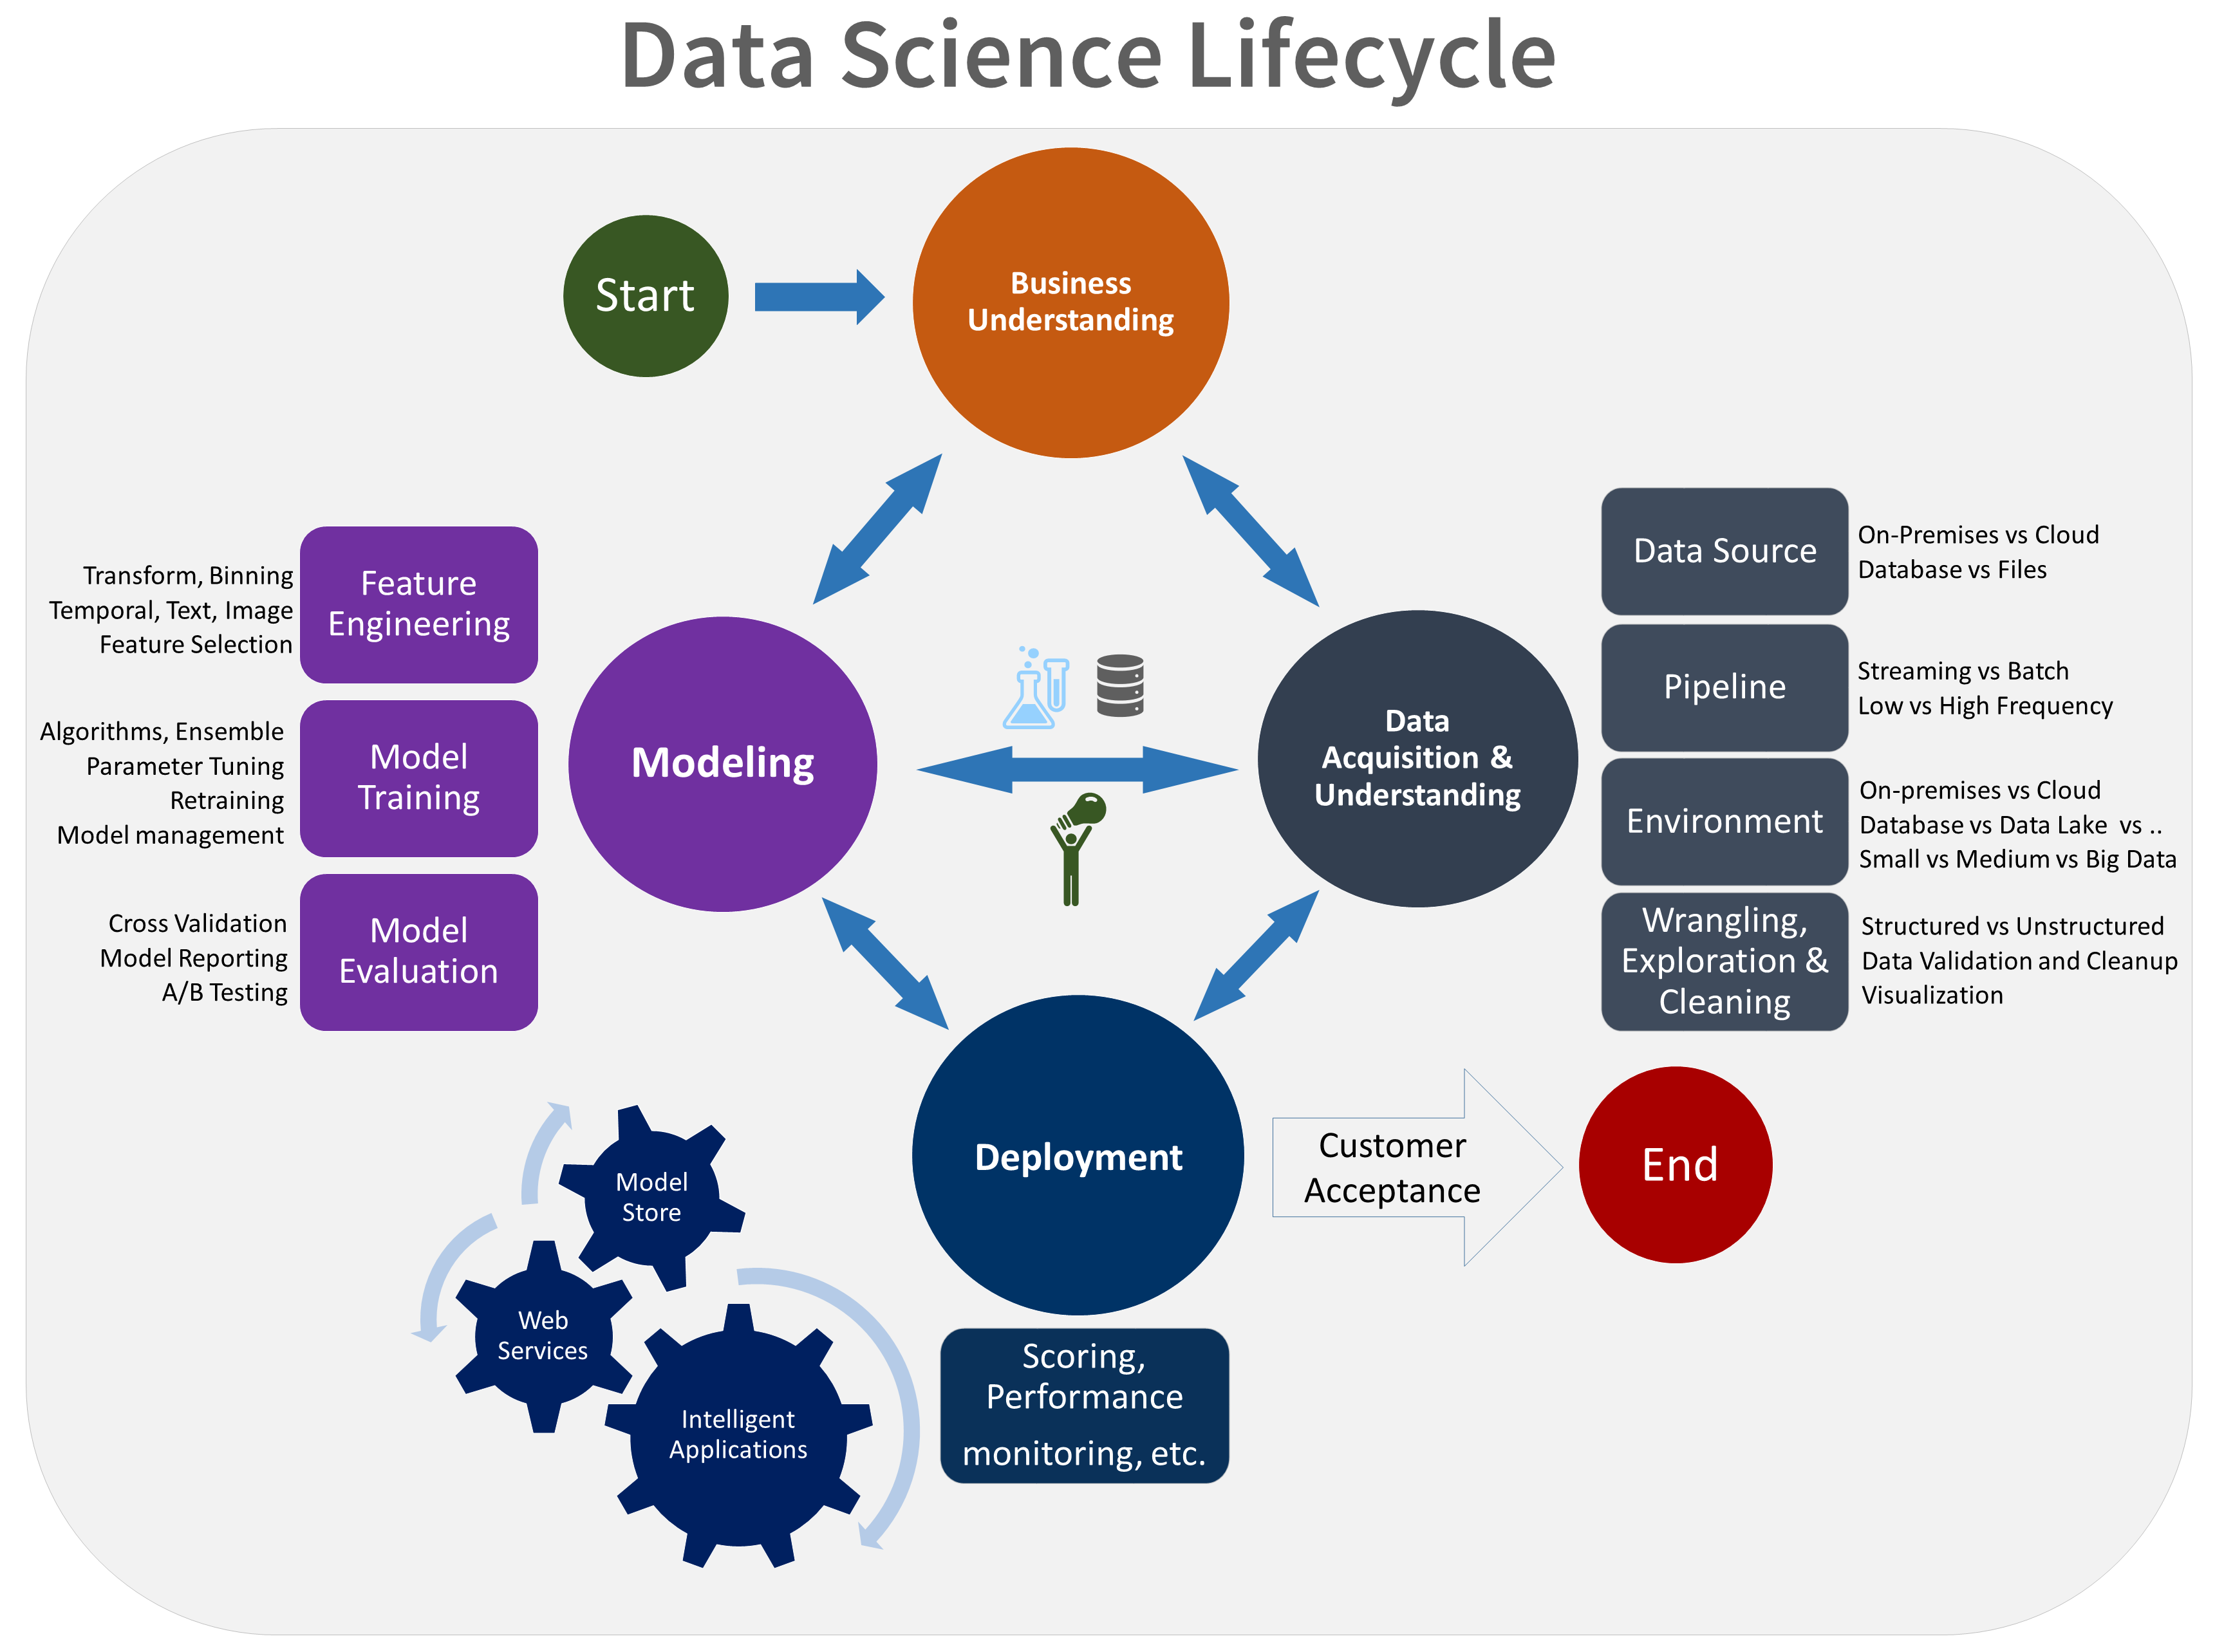
Source: https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle

## Business Intelligence / Understanding

#####  Los Angeles Police Department Area of Operation

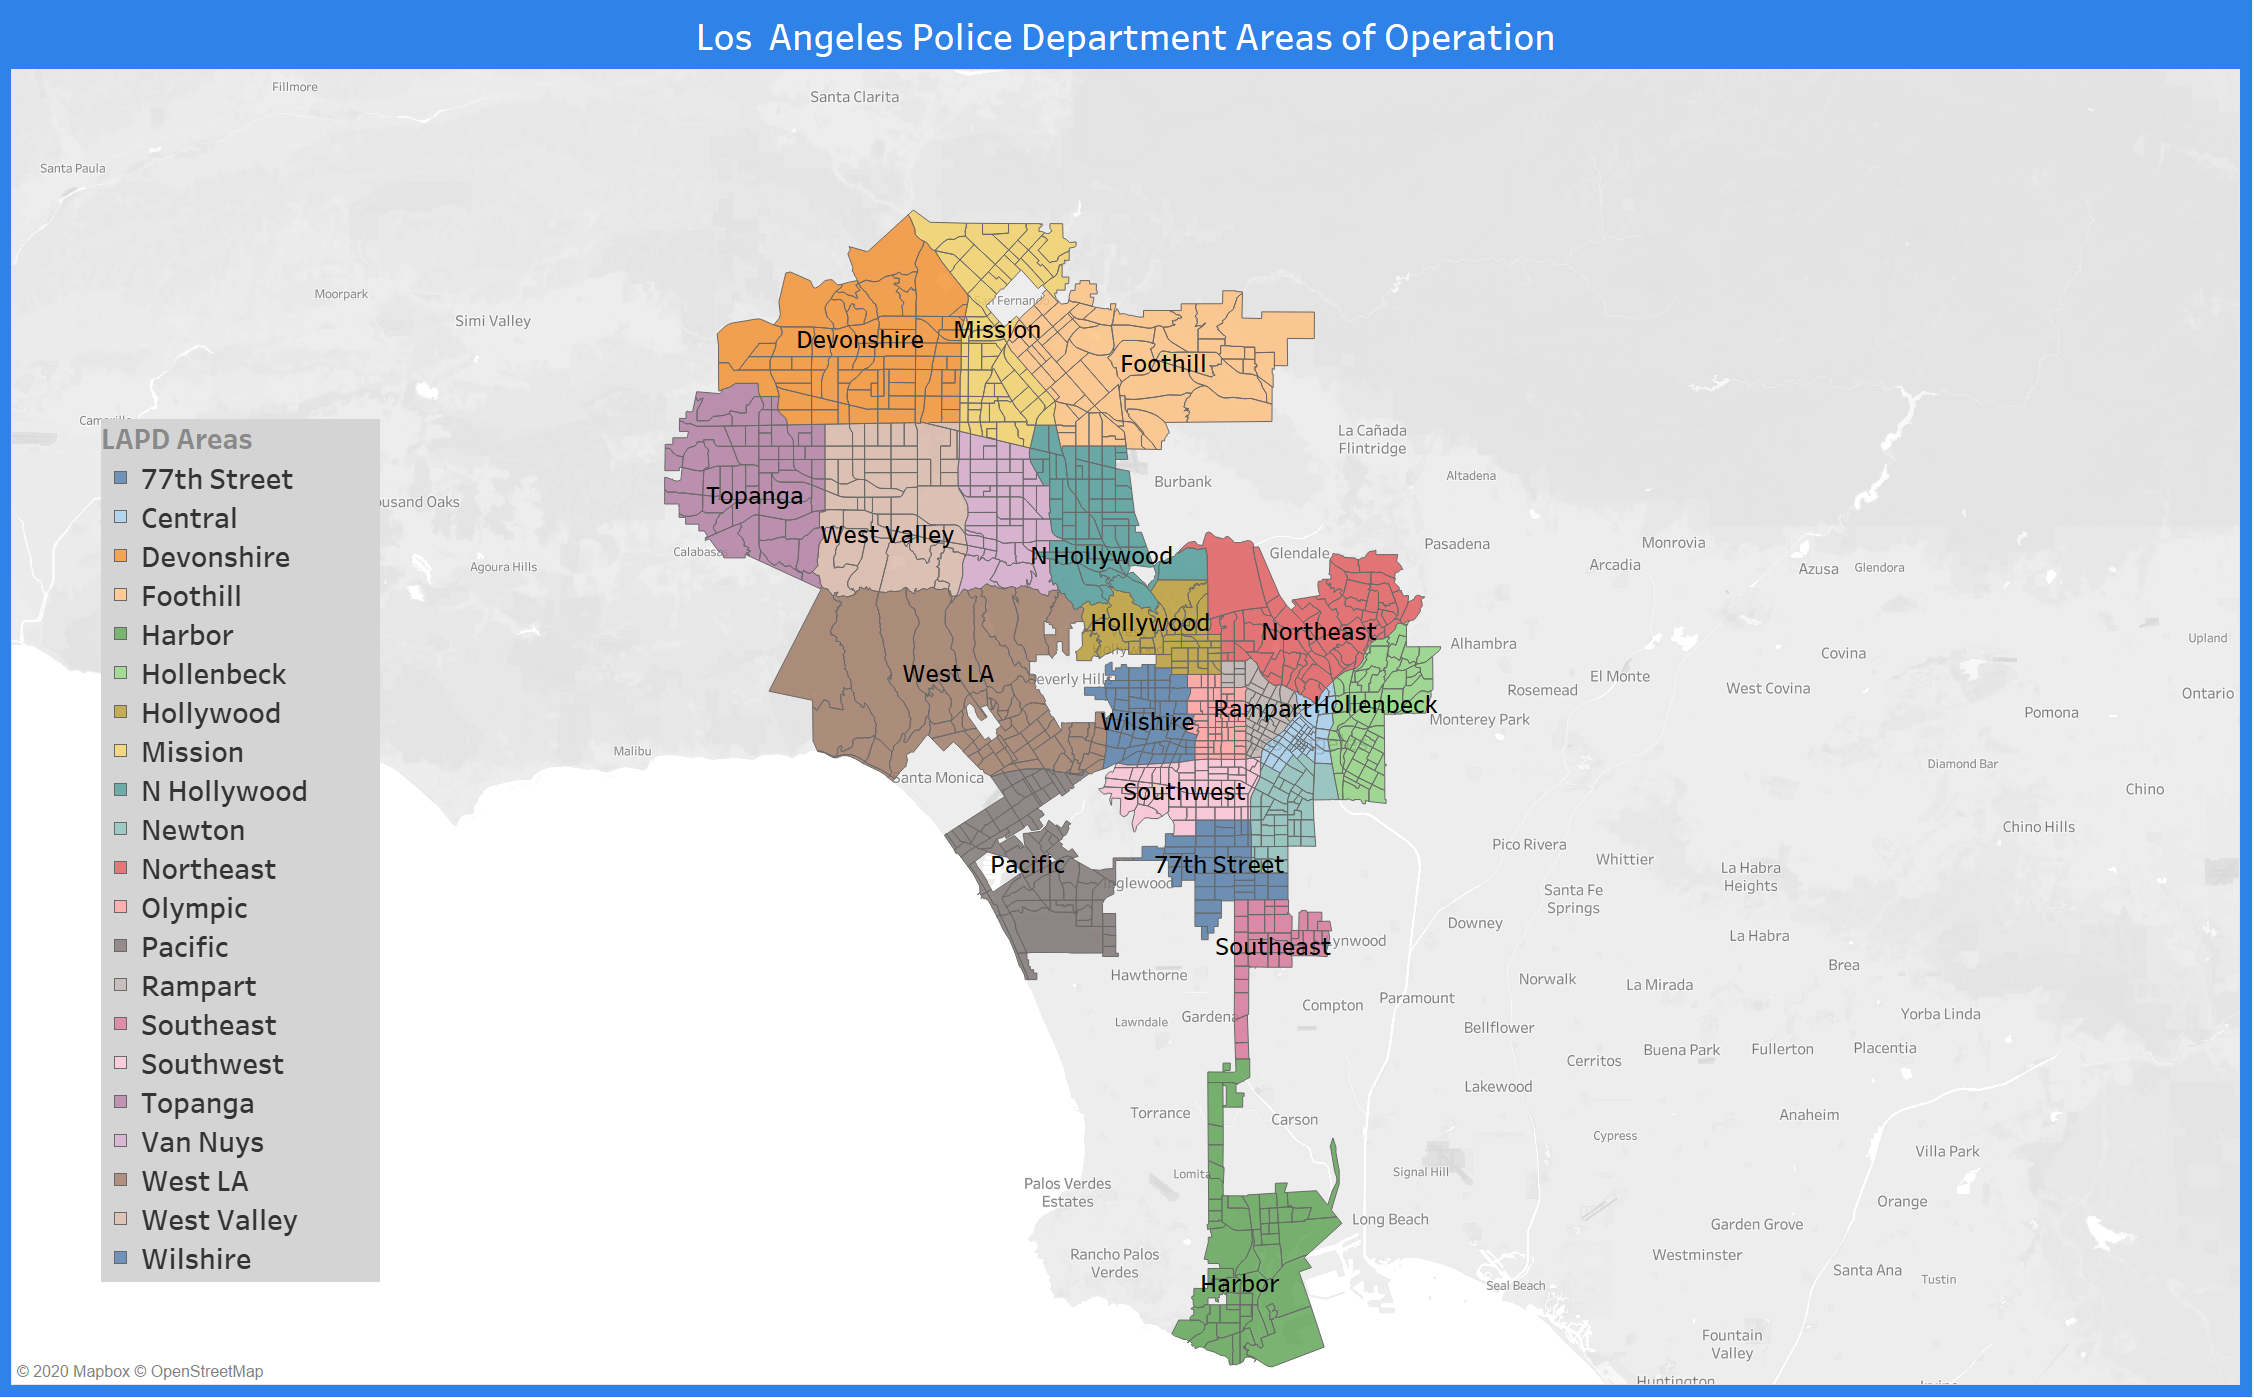

#####  Areas with the highest Property Crimes

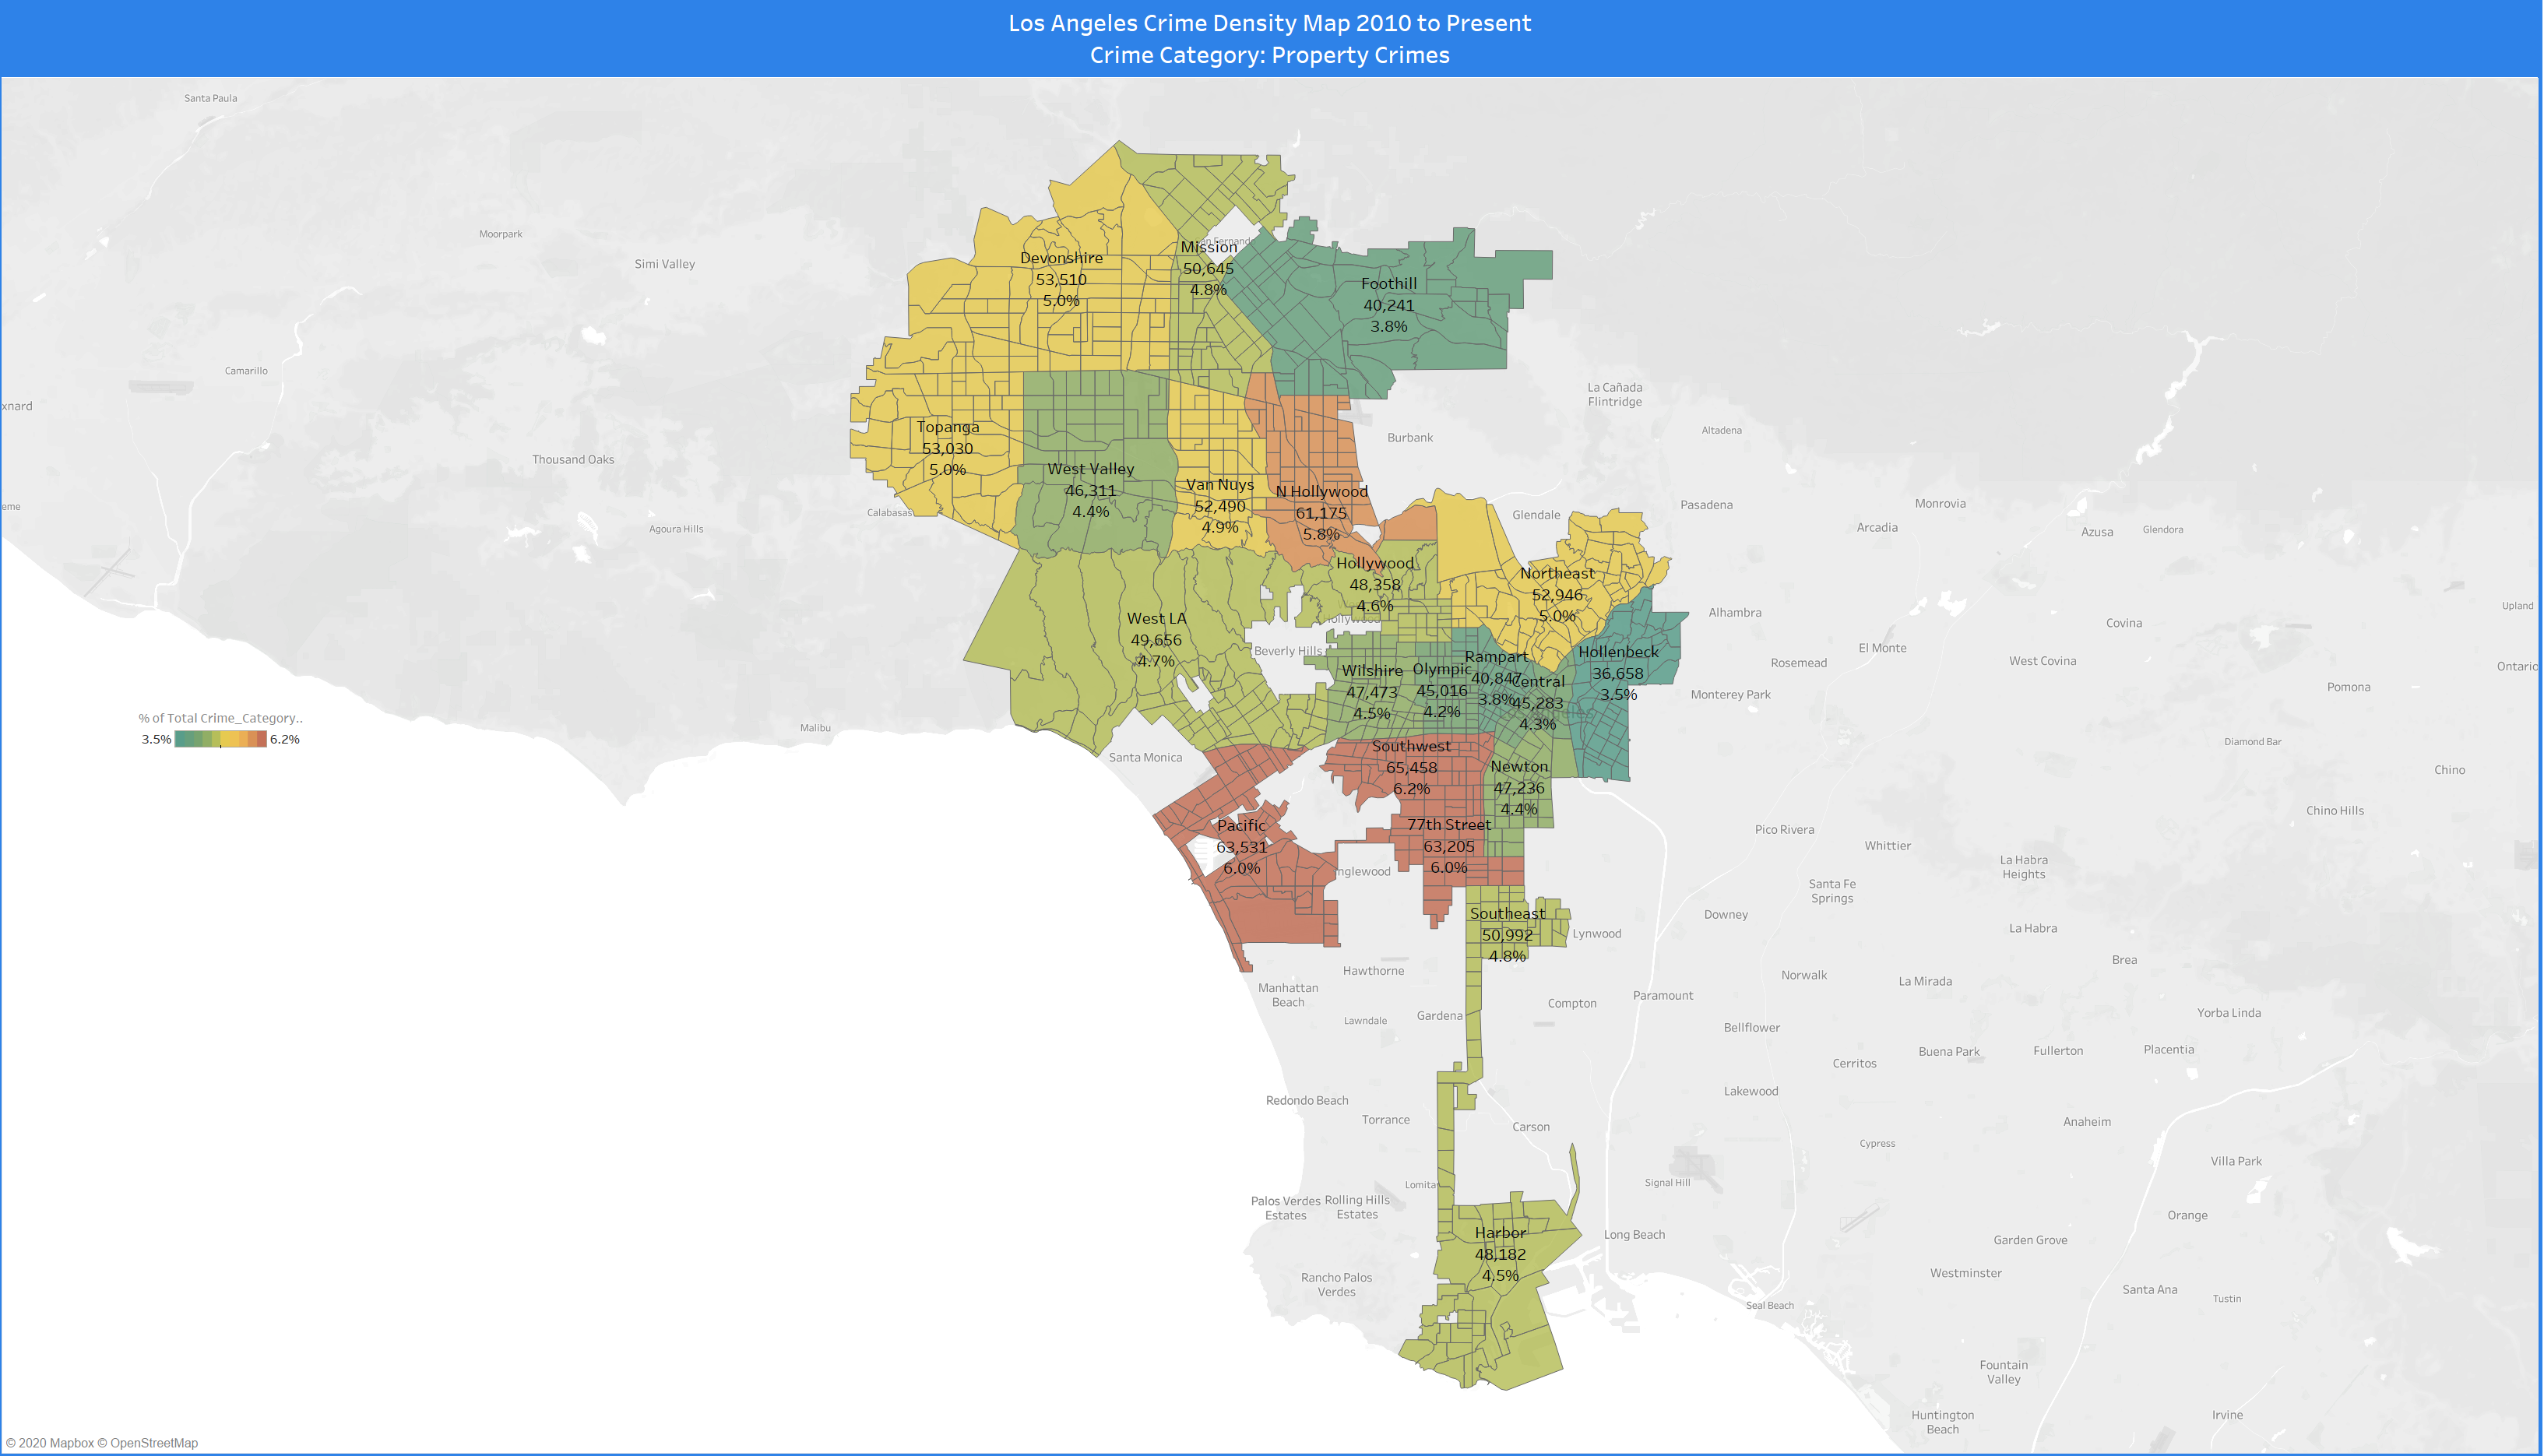

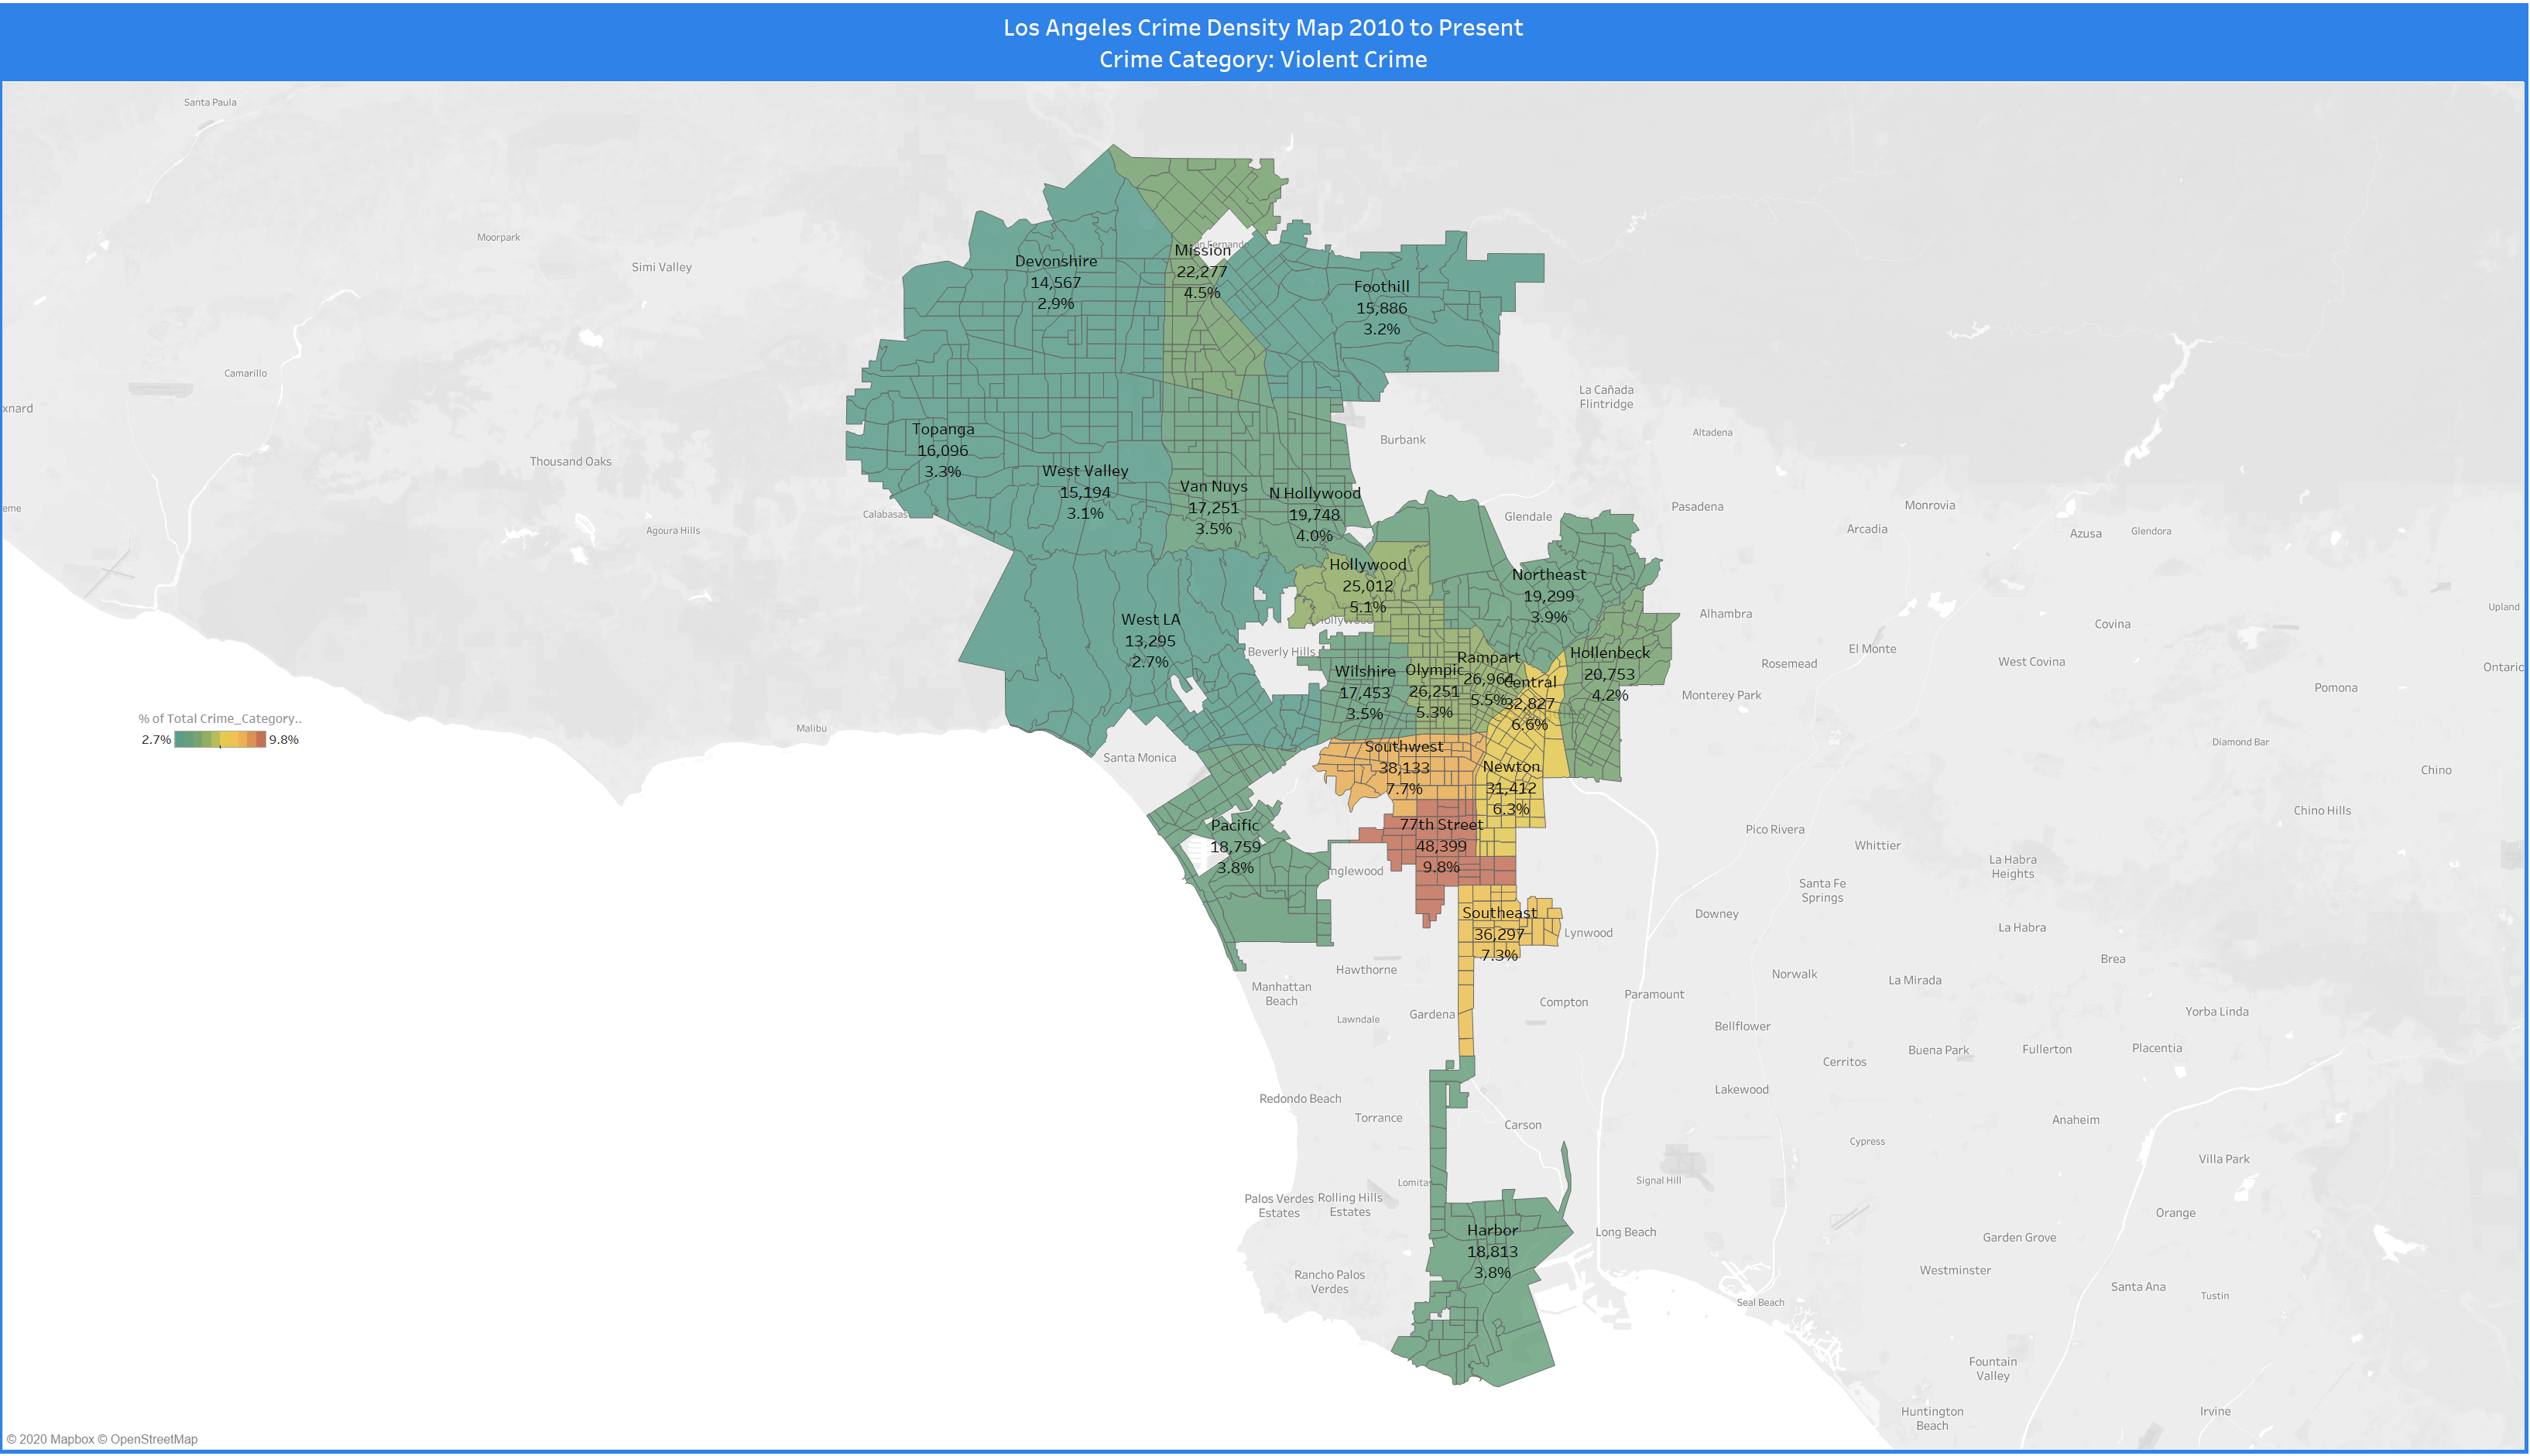

##### Crime Frequency by Time Occured

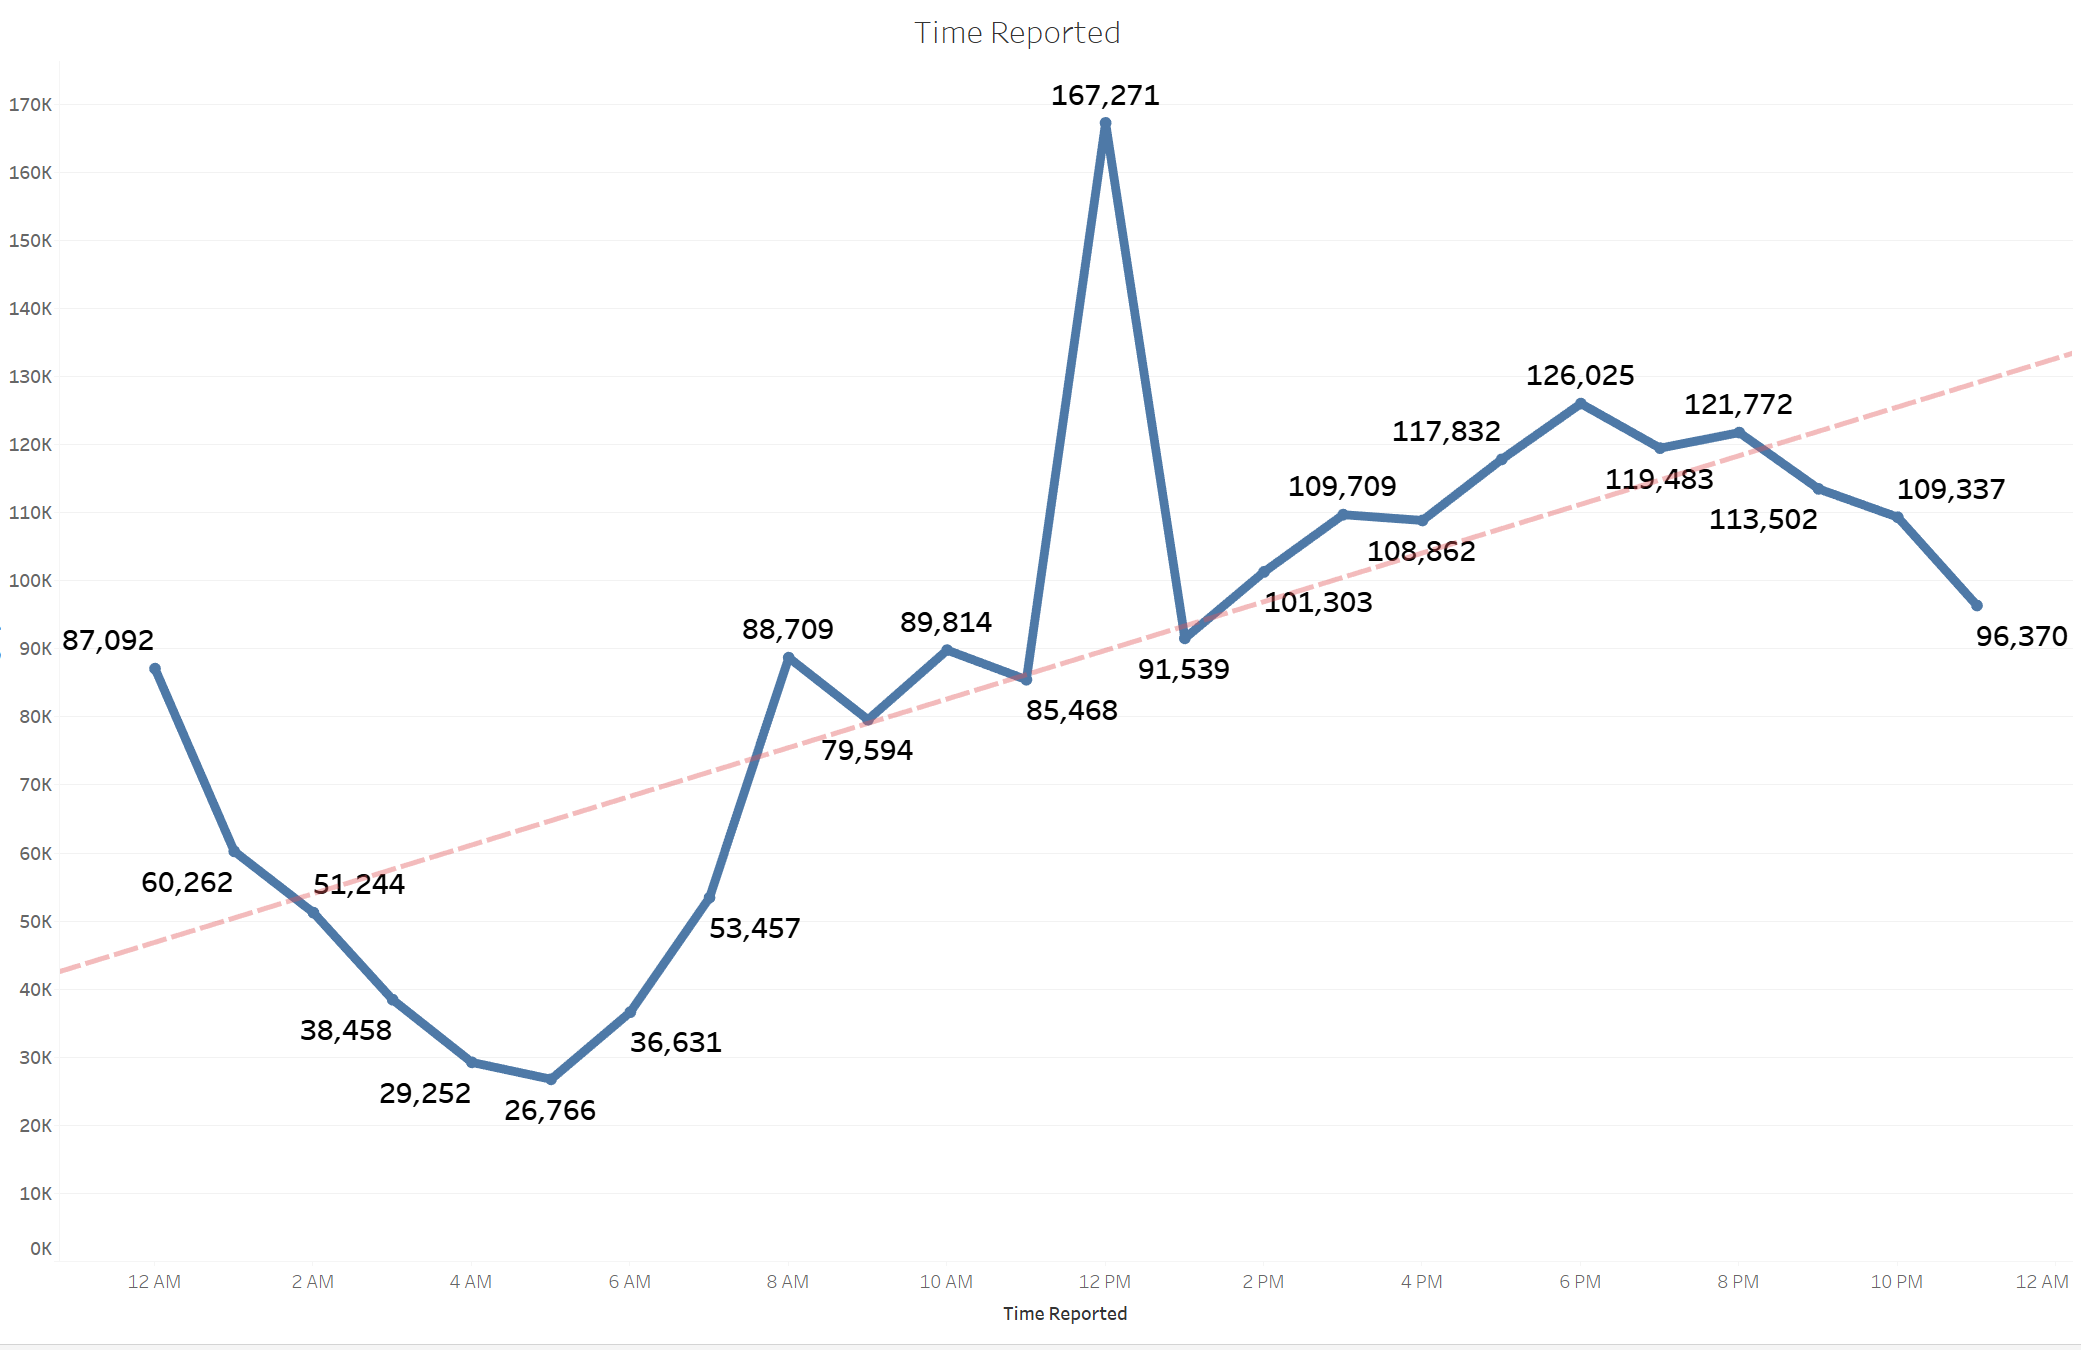

##### Key Trends 

-------------------------------------------------------------------------------------------------------------------------------

##  Import Libraries 

In [1]:
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

#foundational package for scientific computing
import numpy as np

#data processing
import pandas as pd

# visualization
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns
sns.set()


#scientific computing and advance mathematics
import scipy as sp

#machine learning algorithms
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



## Import Dataset

In [2]:
df = pd.read_csv('C:/Users/Home/Desktop/MSDS692 - Data Science Practicum/LAPD-Crime-Stats-2010-2020-raw.csv', index_col=None, na_values=['NA'],
sep=',',low_memory=False)
df.head()


DR_NO               DATE OCC              Date Rptd  TIME OCC  AREA   \
0    1307355  2/20/2010 12:00:00 AM  2/20/2010 12:00:00 AM      1350     13   
1   11401303  9/12/2010 12:00:00 AM  9/13/2010 12:00:00 AM        45     14   
2   70309629   8/9/2010 12:00:00 AM   8/9/2010 12:00:00 AM      1515     13   
3   90631215   1/5/2010 12:00:00 AM   1/5/2010 12:00:00 AM       150      6   
4  100100501   1/2/2010 12:00:00 AM   1/3/2010 12:00:00 AM      2100      1   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton         1385         2     900   
1    Pacific         1485         2     740   
2     Newton         1324         2     946   
3  Hollywood          646         2     900   
4    Central          176         1     122   

                                         Crm Cd Desc          ...           \
0                           VIOLATION OF COURT ORDER          ...            
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...          ...            
2                          OTHER MISCELLANEOUS CRIME          ...            
3                           VIOLATION OF COURT ORDER          ...            
4                                    RAPE, ATTEMPTED          ...            

   Crm Cd 3 Crm Cd 4                                 LOCATION  \
0       NaN      NaN   300 E  GAGE                         AV   
1       NaN      NaN          SEPULVEDA                    BL   
2       NaN      NaN  1300 E  21ST                         ST   
3       NaN      NaN          CAHUENGA                     BL   
4       NaN      NaN          8TH                          ST   

                      Cross Street      LAT       LON Crime Category  \
0                              NaN  33.9825 -118.2695            NaN   
1  MANCHESTER                   AV  33.9599 -118.3962            NaN   
2                              NaN  34.0224 -118.2524            NaN   
3  HOLLYWOOD                    BL  34.1016 -118.3295            NaN   
4  SAN PEDRO                    ST  34.0387 -118.2488  Violent Crime   

   Crime Type Crime Code           Description  
0         NaN        NaN                   NaN  
1         NaN        NaN                   NaN  
2         NaN        NaN                   NaN  
3         NaN        NaN                   NaN  
4        Rape      122.0  122 (Attempted Rape)  

[5 rows x 32 columns]

## Data Dictionary

#### Data Dictionary Location: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z


-------------------------------------------------------------------------------------------------------------------------------

## Data Cleaning

In [3]:
df.columns

Index(['DR_NO', 'DATE OCC', 'Date Rptd', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Crm Cd 1',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Crime Category', 'Crime Type', 'Crime Code', 'Description'],
      dtype='object')

In [4]:
df.shape

(2109752, 32)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109752 entries, 0 to 2109751
Data columns (total 32 columns):
DR_NO             int64
DATE OCC          object
Date Rptd         object
TIME OCC          int64
AREA              int64
AREA NAME         object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc       object
Crm Cd 1          float64
Mocodes           object
Vict Age          int64
Vict Sex          object
Vict Descent      object
Premis Cd         float64
Premis Desc       object
Weapon Used Cd    float64
Weapon Desc       object
Status            object
Status Desc       object
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION          object
Cross Street      object
LAT               float64
LON               float64
Crime Category    object
Crime Type        object
Crime Code        float64
Description       object
dtypes: float64(9), int64(7), object(16)
memory usage: 515.1+ MB
None


In [6]:
# Review the first three rows of data for profiling purposes 
df.head(3)

DR_NO               DATE OCC              Date Rptd  TIME OCC  AREA   \
0   1307355  2/20/2010 12:00:00 AM  2/20/2010 12:00:00 AM      1350     13   
1  11401303  9/12/2010 12:00:00 AM  9/13/2010 12:00:00 AM        45     14   
2  70309629   8/9/2010 12:00:00 AM   8/9/2010 12:00:00 AM      1515     13   

  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Newton         1385         2     900   
1   Pacific         1485         2     740   
2    Newton         1324         2     946   

                                         Crm Cd Desc     ...      Crm Cd 3  \
0                           VIOLATION OF COURT ORDER     ...           NaN   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...     ...           NaN   
2                          OTHER MISCELLANEOUS CRIME     ...           NaN   

  Crm Cd 4                                 LOCATION  \
0      NaN   300 E  GAGE                         AV   
1      NaN          SEPULVEDA                    BL   
2      NaN  1300 E  21ST                         ST   

                      Cross Street      LAT       LON Crime Category  \
0                              NaN  33.9825 -118.2695            NaN   
1  MANCHESTER                   AV  33.9599 -118.3962            NaN   
2                              NaN  34.0224 -118.2524            NaN   

   Crime Type Crime Code Description  
0         NaN        NaN         NaN  
1         NaN        NaN         NaN  
2         NaN        NaN         NaN  

[3 rows x 32 columns]

In [7]:
#After intial review of the dataset dropping the following columns
#that are not needed for the analysis
df = df.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Part 1-2'], axis=1)
df.head(3)

DR_NO               DATE OCC              Date Rptd  TIME OCC  AREA   \
0   1307355  2/20/2010 12:00:00 AM  2/20/2010 12:00:00 AM      1350     13   
1  11401303  9/12/2010 12:00:00 AM  9/13/2010 12:00:00 AM        45     14   
2  70309629   8/9/2010 12:00:00 AM   8/9/2010 12:00:00 AM      1515     13   

  AREA NAME  Rpt Dist No  Crm Cd  \
0    Newton         1385     900   
1   Pacific         1485     740   
2    Newton         1324     946   

                                         Crm Cd Desc  Crm Cd 1     ...      \
0                           VIOLATION OF COURT ORDER     900.0     ...       
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...     740.0     ...       
2                          OTHER MISCELLANEOUS CRIME     946.0     ...       

  Weapon Desc  Status   Status Desc                                 LOCATION  \
0         NaN      AA  Adult Arrest   300 E  GAGE                         AV   
1         NaN      IC   Invest Cont          SEPULVEDA                    BL   
2         NaN      IC   Invest Cont  1300 E  21ST                         ST   

       LAT       LON  Crime Category Crime Type Crime Code Description  
0  33.9825 -118.2695             NaN        NaN        NaN         NaN  
1  33.9599 -118.3962             NaN        NaN        NaN         NaN  
2  34.0224 -118.2524             NaN        NaN        NaN         NaN  

[3 rows x 27 columns]

In [8]:
# Rename columns to more user-friendly names 
df.columns = ['DR_NO', 'Date_Occured', 'Date_Reported','Time_Occured','Area_ID' , 'Area_Name' , 'Reporting_Disc',
                      'Crime_Code' , 'Crime_Desc' , 'Crime_Code1' , 'Mocodes' , 'Victim_Age','Victim_Sex','Victim_Descent' ,
                      'Premesis_Code', 'Premesis_Desc', 'Weapon_Code', 'Weapon_Desc', 'Status', 'Status_Desc', 'Location',
                       'Latitude', 'Longitude', 'Crime_Category', 'Crime_Type', 'Crime_Code2', 'Description']

In [9]:
#Conduct closer inspection of three features that are important 
#to our analysis; Crime Description, Crime Status, and Premesis Types 

print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of crime in this dataset such as {}... \n".format(len(df.Crime_Desc.unique()),
                                                                           ", ".join(df.Crime_Desc.unique()[0:5])))

print("There are {} case statuses in this dataset such as {}... \n".format(len(df.Status_Desc.unique()),
                                                                                      ", ".join(df.Status_Desc.unique()[0:5])))

print("There are {} premesis types in this dataset such as {}... \n".format(len(df.Premesis_Desc.unique()),
                                                                                      ", ".join(df.Premesis_Desc.unique()[0:5])))


There are 2109752 observations and 27 features in this dataset. 

There are 141 types of crime in this dataset such as VIOLATION OF COURT ORDER, VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), OTHER MISCELLANEOUS CRIME, RAPE, ATTEMPTED, SHOPLIFTING - PETTY THEFT ($950 & UNDER)... 

There are 6 case statuses in this dataset such as Adult Arrest, Invest Cont, Adult Other, Juv Arrest, UNK... 

There are 320 premesis types in this dataset such as SINGLE FAMILY DWELLING, STREET, ALLEY, DEPARTMENT STORE, OTHER PREMISE... 



In [10]:
# Determine which features have missing values and gauge the magnitude of the missing values
print(df.isna().sum())

DR_NO                   0
Date_Occured            0
Date_Reported           0
Time_Occured            0
Area_ID                 0
Area_Name               0
Reporting_Disc          0
Crime_Code              0
Crime_Desc              0
Crime_Code1            10
Mocodes            227455
Victim_Age              0
Victim_Sex         196518
Victim_Descent     196565
Premesis_Code          53
Premesis_Desc         185
Weapon_Code       1400359
Weapon_Desc       1400360
Status                  3
Status_Desc             0
Location                0
Latitude                0
Longitude               0
Crime_Category     552823
Crime_Type         552823
Crime_Code2        552823
Description        552823
dtype: int64


In [11]:
#Closer look at select columns

# Mocodes
# Victim_Sex
# Victim_Descent
# Weapon_Code
# Weapon_Desc
# Crime_Category
# Crime_Type
# Crime_Code2
# Description

In [12]:
#looking at the first couple of rows of the columns listed above. 
df.loc[0:3, ["Date_Occured", "Date_Reported", "Victim_Sex", "Mocodes", "Victim_Descent", "Weapon_Code", "Weapon_Desc", "Crime_Category","Crime_Code",
              "Description"]]

Date_Occured          Date_Reported Victim_Sex         Mocodes  \
0  2/20/2010 12:00:00 AM  2/20/2010 12:00:00 AM          M  0913 1814 2000   
1  9/12/2010 12:00:00 AM  9/13/2010 12:00:00 AM          M            0329   
2   8/9/2010 12:00:00 AM   8/9/2010 12:00:00 AM          M            0344   
3   1/5/2010 12:00:00 AM   1/5/2010 12:00:00 AM          F  1100 0400 1402   

            Victim_Descent  Weapon_Code Weapon_Desc Crime_Category  \
0  Hispanic/Latin/Mexican           NaN         NaN            NaN   
1                   White           NaN         NaN            NaN   
2  Hispanic/Latin/Mexican           NaN         NaN            NaN   
3                   White         102.0    HAND GUN            NaN   

   Crime_Code Description  
0         900         NaN  
1         740         NaN  
2         946         NaN  
3         900         NaN

In [13]:
# Create Date and Time series using the Date Occurred column
df['Date_Occured'] = pd.to_datetime(df['Date_Occured'])

In [14]:
# Create Date and Time series using the Date Reported column
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])

In [15]:
# Calculate the number of days between the time a crime occurs and 
# when the crime is reported to the local authorities. 
df['Days to Report'] = df['Date_Reported'] - df['Date_Occured']

In [16]:
# Convert the number of days to report a crime from date 
# to Hours then check the results
df['Hours to Report'] = df['Days to Report'] / np.timedelta64(1, 'h')

In [17]:
df['Year'] = df['Date_Occured'].dt.year
df['Month'] = df['Date_Occured'].dt.month
df['Week_Day'] = df['Date_Occured'].dt.weekday
df['Day'] = df['Date_Occured'].dt.day

In [18]:
df.head(3)

DR_NO Date_Occured Date_Reported  Time_Occured  Area_ID Area_Name  \
0   1307355   2010-02-20    2010-02-20          1350       13    Newton   
1  11401303   2010-09-12    2010-09-13            45       14   Pacific   
2  70309629   2010-08-09    2010-08-09          1515       13    Newton   

   Reporting_Disc  Crime_Code  \
0            1385         900   
1            1485         740   
2            1324         946   

                                          Crime_Desc  Crime_Code1 ...  \
0                           VIOLATION OF COURT ORDER        900.0 ...   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        740.0 ...   
2                          OTHER MISCELLANEOUS CRIME        946.0 ...   

  Crime_Category  Crime_Type Crime_Code2 Description  Days to Report  \
0            NaN         NaN         NaN         NaN          0 days   
1            NaN         NaN         NaN         NaN          1 days   
2            NaN         NaN         NaN         NaN          0 days   

  Hours to Report  Year Month Week_Day Day  
0             0.0  2010     2        5  20  
1            24.0  2010     9        6  12  
2             0.0  2010     8        0   9  

[3 rows x 33 columns]

In [19]:
print('Columns with null values: {} \n' .format( df.isnull().sum()))

Columns with null values: DR_NO                    0
Date_Occured             0
Date_Reported            0
Time_Occured             0
Area_ID                  0
Area_Name                0
Reporting_Disc           0
Crime_Code               0
Crime_Desc               0
Crime_Code1             10
Mocodes             227455
Victim_Age               0
Victim_Sex          196518
Victim_Descent      196565
Premesis_Code           53
Premesis_Desc          185
Weapon_Code        1400359
Weapon_Desc        1400360
Status                   3
Status_Desc              0
Location                 0
Latitude                 0
Longitude                0
Crime_Category      552823
Crime_Type          552823
Crime_Code2         552823
Description         552823
Days to Report           0
Hours to Report          0
Year                     0
Month                    0
Week_Day                 0
Day                      0
dtype: int64 



In [20]:
print(df.isna().sum())

DR_NO                    0
Date_Occured             0
Date_Reported            0
Time_Occured             0
Area_ID                  0
Area_Name                0
Reporting_Disc           0
Crime_Code               0
Crime_Desc               0
Crime_Code1             10
Mocodes             227455
Victim_Age               0
Victim_Sex          196518
Victim_Descent      196565
Premesis_Code           53
Premesis_Desc          185
Weapon_Code        1400359
Weapon_Desc        1400360
Status                   3
Status_Desc              0
Location                 0
Latitude                 0
Longitude                0
Crime_Category      552823
Crime_Type          552823
Crime_Code2         552823
Description         552823
Days to Report           0
Hours to Report          0
Year                     0
Month                    0
Week_Day                 0
Day                      0
dtype: int64


In [21]:
df.describe()

DR_NO  Time_Occured       Area_ID  Reporting_Disc    Crime_Code  \
count  2.109752e+06  2.109752e+06  2.109752e+06    2.109752e+06  2.109752e+06   
mean   1.478075e+08  1.360759e+03  1.108734e+01    1.155123e+03  5.070618e+02   
std    2.880482e+07  6.469859e+02  6.012494e+00    6.012631e+02  2.104558e+02   
min    1.120000e+02  1.000000e+00  1.000000e+00    1.000000e+02  1.100000e+02   
25%    1.214204e+08  9.300000e+02  6.000000e+00    6.430000e+02  3.300000e+02   
50%    1.508047e+08  1.430000e+03  1.100000e+01    1.189000e+03  4.420000e+02   
75%    1.715065e+08  1.900000e+03  1.600000e+01    1.668000e+03  6.260000e+02   
max    9.102204e+08  2.359000e+03  2.100000e+01    2.199000e+03  9.560000e+02   

        Crime_Code1    Victim_Age  Premesis_Code    Weapon_Code      Latitude  \
count  2.109742e+06  2.109752e+06   2.109699e+06  709393.000000  2.109752e+06   
mean   5.068863e+02  3.178372e+01   3.107748e+02     371.329296  3.406372e+01   
std    2.103187e+02  2.063653e+01   2.111934e+02     113.517455  7.116523e-01   
min    1.100000e+02 -9.000000e+00   1.010000e+02     101.000000  0.000000e+00   
25%    3.300000e+02  2.000000e+01   1.020000e+02     400.000000  3.401040e+01   
50%    4.410000e+02  3.200000e+01   2.100000e+02     400.000000  3.406230e+01   
75%    6.260000e+02  4.600000e+01   5.010000e+02     400.000000  3.417570e+01   
max    9.990000e+02  1.180000e+02   9.710000e+02     516.000000  3.479070e+01   

          Longitude   Crime_Code2            Days to Report  Hours to Report  \
count  2.109752e+06  1.556929e+06                   2109752     2.109752e+06   
mean  -1.183088e+02  4.437887e+02   18 days 10:21:55.222642     4.423653e+02   
std    2.440947e+00  1.724063e+02  124 days 03:59:54.825965     2.979999e+03   
min   -1.188279e+02  1.100000e+02           0 days 00:00:00     0.000000e+00   
25%   -1.184363e+02  3.300000e+02           0 days 00:00:00     0.000000e+00   
50%   -1.183295e+02  4.400000e+02           1 days 00:00:00     2.400000e+01   
75%   -1.182778e+02  6.240000e+02           2 days 00:00:00     4.800000e+01   
max    0.000000e+00  9.300000e+02        3660 days 00:00:00     8.784000e+04   

               Year         Month      Week_Day           Day  
count  2.109752e+06  2.109752e+06  2.109752e+06  2.109752e+06  
mean   2.014618e+03  6.519741e+00  3.005608e+00  1.551906e+01  
std    2.881236e+00  3.431543e+00  1.988265e+00  8.921732e+00  
min    2.010000e+03  1.000000e+00  0.000000e+00  1.000000e+00  
25%    2.012000e+03  4.000000e+00  1.000000e+00  8.000000e+00  
50%    2.015000e+03  7.000000e+00  3.000000e+00  1.600000e+01  
75%    2.017000e+03  9.000000e+00  5.000000e+00  2.300000e+01  
max    2.019000e+03  1.200000e+01  6.000000e+00  3.100000e+01

In [22]:
# Weapon code and description have a very high percentage of missing data
print(1400359/2109752)

0.6637552660217884


Over 66% of the weapons code and description is missing/null. Given the high percentages of missing data and the fact that these two columns are not essential to our predictive model - we will likely remove these from the dataset. However additional data cleansing is needed before a final decision on the inclusion/exclusion of these variables. 

## Feature Engineering 

##### Data imputation to fill missing NA/s

In [23]:
df['Weapon_Desc'].value_counts()[:5].sort_values(ascending=False)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    429832
VERBAL THREAT                                      58599
UNKNOWN WEAPON/OTHER WEAPON                        57362
HAND GUN                                           34099
SEMI-AUTOMATIC PISTOL                              12900
Name: Weapon_Desc, dtype: int64

Quick review of the Weapon Descrition data shows Strong-Arm is the most prevalent weapons type. Will likely use data imputation to fill missing values. 

In [24]:
df['Description'].value_counts()[:5].sort_values(ascending=False)

624 (Battery - misdemeanor)    190535
330 (Burg from Vehicle)        162098
510 (Stolen Vehicle)           159781
440 (Theft - $950 & under)     149623
310 (Burglary)                 147465
Name: Description, dtype: int64

In [25]:
df['Crime_Type'].value_counts()[:5].sort_values(ascending=False)

Other Theft                    294342
Burglary Theft from Vehicle    286194
Simple Assualt                 266364
Grand Theft Auto               163605
Burglary                       159997
Name: Crime_Type, dtype: int64

In [26]:
# Fill in missing values in the Mocodes column using mode method
mode_mocodes_desc = df.Mocodes.mode()[0]
print(mode_mocodes_desc)

0344


In [27]:
df.Mocodes.fillna(mode_mocodes_desc, inplace=True)

In [28]:
# Fill in missing values in the Victim_Sex column using mode method
mode_Victim_Sex_desc = df.Victim_Sex.mode()[0]
print(mode_Victim_Sex_desc)

M


In [29]:
df.Victim_Sex.fillna(mode_Victim_Sex_desc, inplace=True)

In [30]:
# Fill in missing values in the Victim_Descent column using mode method
mode_Victim_Descent = df.Victim_Descent.mode()[0]
print(mode_Victim_Descent)

Hispanic/Latin/Mexican 


In [31]:
df.Victim_Descent.fillna(mode_Victim_Descent, inplace=True)

In [32]:
# Fill in missing values in the Weapon_Code column using mode method
mode_Weapon_Code = df.Weapon_Code.mode()[0]
print(mode_Weapon_Code)

400.0


In [33]:
df.Weapon_Code.fillna(mode_Weapon_Code, inplace=True)

In [34]:
# Fill in missing values in the Weapon_Desc column using mode method
mode_Weapon_Desc = df.Weapon_Desc.mode()[0]
print(mode_Weapon_Desc)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)


In [35]:
df.Weapon_Desc.fillna(mode_Weapon_Desc, inplace=True)

In [36]:
# Fill in missing values in the Crime_Category column using mode method
mode_Crime_Category = df.Crime_Category.mode()[0]
print(mode_Crime_Category)

Property Crimes


In [37]:
df.Crime_Category.fillna(mode_Crime_Category, inplace=True)

In [38]:
# Fill in missing values in the Crime_Type column using mode method
mode_Crime_Type = df.Crime_Type.mode()[0]
print(mode_Crime_Type)

Other Theft


In [39]:
df.Crime_Type.fillna(mode_Crime_Type, inplace=True)

In [40]:
# Fill in missing values in the Crime_Code2 column using mode method
mode_Crime_Code2 = df.Crime_Code2.mode()[0]
print(mode_Crime_Code2)

624.0


In [41]:
df.Crime_Code2.fillna(mode_Crime_Code2, inplace=True)

In [42]:
# Fill in missing values in the Description column using mode method
mode_Description = df.Description.mode()[0]
print(mode_Description)

624 (Battery - misdemeanor)


In [43]:
df.Description.fillna(mode_Description, inplace=True)

In [44]:
# Converting two list into a dictionary 
# Personal Crimes
PersonalCrimes = [236, 880,956, 251, 910, 954, 932, 928, 627, 761, 901, 814, 231, 452, 352, 760, 220, 815,
237, 860, 822, 905, 865, 113, 884, 110, 762, 886, 436, 753, 624, 903, 623, 353, 870, 830, 813, 647,
230, 626, 435, 902, 121,235, 906, 930, 625, 940, 438, 840, 351, 450, 622, 952, 434, 453, 806,
805, 922, 451, 850, 122, 821, 812, 900, 763, 755, 921, 250, 210, 948, 437, 920, 943, 820, 933,
810, 882, 350, 446]
    
# Property Crimes
NonPersonal = [654, 331, 440, 474, 480, 487, 444, 347, 756, 510, 946, 653, 668, 441, 442, 410, 931, 345, 421,
445, 473, 485, 924, 520, 349, 661, 951, 471, 470, 343, 649, 944,670, 888, 745, 660, 740,330,
475, 432, 310, 341, 443, 651, 664, 652, 949, 354, 666, 439, 522, 472, 942, 320,926, 491, 662, 433, 420, 648, 890, 950]


In [45]:
df.loc[df['Crime_Code'].notna() & df['Crime_Code'].isin(NonPersonal), 'Primary_Category'] = 'NonPersonal Crimes'

In [46]:
df.loc[df['Crime_Code'].notna() & df['Crime_Code'].isin(PersonalCrimes), 'Primary_Category'] = 'Personal Crimes'

In [47]:
df.head()

DR_NO Date_Occured Date_Reported  Time_Occured  Area_ID  Area_Name  \
0    1307355   2010-02-20    2010-02-20          1350       13     Newton   
1   11401303   2010-09-12    2010-09-13            45       14    Pacific   
2   70309629   2010-08-09    2010-08-09          1515       13     Newton   
3   90631215   2010-01-05    2010-01-05           150        6  Hollywood   
4  100100501   2010-01-02    2010-01-03          2100        1    Central   

   Reporting_Disc  Crime_Code  \
0            1385         900   
1            1485         740   
2            1324         946   
3             646         900   
4             176         122   

                                          Crime_Desc  Crime_Code1  \
0                           VIOLATION OF COURT ORDER        900.0   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        740.0   
2                          OTHER MISCELLANEOUS CRIME        946.0   
3                           VIOLATION OF COURT ORDER        900.0   
4                                    RAPE, ATTEMPTED        122.0   

          ...           Crime_Type  Crime_Code2                  Description  \
0         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
1         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
2         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
3         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
4         ...                 Rape        122.0         122 (Attempted Rape)   

  Days to Report  Hours to Report  Year  Month Week_Day Day  \
0         0 days              0.0  2010      2        5  20   
1         1 days             24.0  2010      9        6  12   
2         0 days              0.0  2010      8        0   9   
3         0 days              0.0  2010      1        1   5   
4         1 days             24.0  2010      1        5   2   

     Primary_Category  
0     Personal Crimes  
1  NonPersonal Crimes  
2  NonPersonal Crimes  
3     Personal Crimes  
4     Personal Crimes  

[5 rows x 34 columns]

In [48]:
# df.loc[df['Primary_Category'].isna() & df['Crime_Code'].isin(PropertyCrimes), 'Primary_Category'] = 'Property Crimes'

In [49]:
#Check dataframe for na's after imputation 
print(df.isna().sum())

DR_NO                 0
Date_Occured          0
Date_Reported         0
Time_Occured          0
Area_ID               0
Area_Name             0
Reporting_Disc        0
Crime_Code            0
Crime_Desc            0
Crime_Code1          10
Mocodes               0
Victim_Age            0
Victim_Sex            0
Victim_Descent        0
Premesis_Code        53
Premesis_Desc       185
Weapon_Code           0
Weapon_Desc           0
Status                3
Status_Desc           0
Location              0
Latitude              0
Longitude             0
Crime_Category        0
Crime_Type            0
Crime_Code2           0
Description           0
Days to Report        0
Hours to Report       0
Year                  0
Month                 0
Week_Day              0
Day                   0
Primary_Category      0
dtype: int64


In [50]:
# drop any rows with na specifically targeting 
df = df.dropna(subset=['Crime_Code1','Mocodes','Victim_Sex', 'Victim_Descent', 'Premesis_Code', 'Premesis_Desc',
                      'Weapon_Code','Weapon_Desc','Status','Crime_Category','Crime_Type','Crime_Code2','Description'])
df.shape

(2109555, 34)

In [51]:
# Review data imputation 
df.loc[0:10, ["Victim_Sex", "Mocodes", "Victim_Descent", "Weapon_Code", "Weapon_Desc", "Crime_Category"]]

Victim_Sex         Mocodes           Victim_Descent  Weapon_Code  \
0           M  0913 1814 2000  Hispanic/Latin/Mexican         400.0   
1           M            0329                   White         400.0   
2           M            0344  Hispanic/Latin/Mexican         400.0   
3           F  1100 0400 1402                   White         102.0   
4           F            0400  Hispanic/Latin/Mexican         400.0   
5           M       0344 1402                   Black         400.0   
6           M            0344  Hispanic/Latin/Mexican         400.0   
7           M            0416                   Black         500.0   
8           M       0400 0416  Hispanic/Latin/Mexican         400.0   
9           M       0344 1402                   White         400.0   
10          F  0400 0429 2000                   Black         400.0   

                                       Weapon_Desc   Crime_Category  
0   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Property Crimes  
1   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Property Crimes  
2   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Property Crimes  
3                                         HAND GUN  Property Crimes  
4   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    Violent Crime  
5   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Property Crimes  
6   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Property Crimes  
7                      UNKNOWN WEAPON/OTHER WEAPON    Violent Crime  
8   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    Violent Crime  
9   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Property Crimes  
10  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    Violent Crime

In [52]:
# Check dataset for null values after data imputation 
df.head()

DR_NO Date_Occured Date_Reported  Time_Occured  Area_ID  Area_Name  \
0    1307355   2010-02-20    2010-02-20          1350       13     Newton   
1   11401303   2010-09-12    2010-09-13            45       14    Pacific   
2   70309629   2010-08-09    2010-08-09          1515       13     Newton   
3   90631215   2010-01-05    2010-01-05           150        6  Hollywood   
4  100100501   2010-01-02    2010-01-03          2100        1    Central   

   Reporting_Disc  Crime_Code  \
0            1385         900   
1            1485         740   
2            1324         946   
3             646         900   
4             176         122   

                                          Crime_Desc  Crime_Code1  \
0                           VIOLATION OF COURT ORDER        900.0   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        740.0   
2                          OTHER MISCELLANEOUS CRIME        946.0   
3                           VIOLATION OF COURT ORDER        900.0   
4                                    RAPE, ATTEMPTED        122.0   

          ...           Crime_Type  Crime_Code2                  Description  \
0         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
1         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
2         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
3         ...          Other Theft        624.0  624 (Battery - misdemeanor)   
4         ...                 Rape        122.0         122 (Attempted Rape)   

  Days to Report  Hours to Report  Year  Month Week_Day Day  \
0         0 days              0.0  2010      2        5  20   
1         1 days             24.0  2010      9        6  12   
2         0 days              0.0  2010      8        0   9   
3         0 days              0.0  2010      1        1   5   
4         1 days             24.0  2010      1        5   2   

     Primary_Category  
0     Personal Crimes  
1  NonPersonal Crimes  
2  NonPersonal Crimes  
3     Personal Crimes  
4     Personal Crimes  

[5 rows x 34 columns]

# Exploratory Data Analysis

In this section will attempt to explore the dataset to determined how to build the machine learning model 

In [53]:
##Compute Summary Statistics
# Groupby by Reporting Area
Area_Name = df.groupby("Area_Name")

# Summary statistic of all reporting areas
Area_Name.describe()

Area_ID                                          Crime_Code  \
                count  mean  std   min   25%   50%   75%   max      count   
Area_Name                                                                   
77th Street  144959.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   144959.0   
Central       97841.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0    97841.0   
Devonshire    96175.0  17.0  0.0  17.0  17.0  17.0  17.0  17.0    96175.0   
Foothill      79555.0  16.0  0.0  16.0  16.0  16.0  16.0  16.0    79555.0   
Harbor        91754.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0    91754.0   
Hollenbeck    77754.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0    77754.0   
Hollywood     98766.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0    98766.0   
Mission      103231.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   103231.0   
N Hollywood  113568.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0   113568.0   
Newton        99757.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0    99757.0   
Northeast    100010.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0   100010.0   
Olympic       95114.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0    95114.0   
Pacific      112273.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0   112273.0   
Rampart       89417.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0    89417.0   
Southeast    111288.0  18.0  0.0  18.0  18.0  18.0  18.0  18.0   111288.0   
Southwest    135178.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   135178.0   
Topanga       97323.0  21.0  0.0  21.0  21.0  21.0  21.0  21.0    97323.0   
Van Nuys      99351.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0    99351.0   
West LA       88792.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0    88792.0   
West Valley   89211.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0    89211.0   
Wilshire      88238.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0    88238.0   

                          ...   Week_Day           Year               \
                   mean   ...        75%  max     count         mean   
Area_Name                 ...                                          
77th Street  500.076732   ...        5.0  6.0  144959.0  2014.539421   
Central      509.137243   ...        5.0  6.0   97841.0  2015.157746   
Devonshire   500.241300   ...        5.0  6.0   96175.0  2014.472784   
Foothill     516.577110   ...        5.0  6.0   79555.0  2014.391616   
Harbor       518.943098   ...        5.0  6.0   91754.0  2014.448820   
Hollenbeck   525.572755   ...        5.0  6.0   77754.0  2014.766379   
Hollywood    503.123150   ...        5.0  6.0   98766.0  2014.742573   
Mission      522.420600   ...        5.0  6.0  103231.0  2014.434472   
N Hollywood  504.041438   ...        5.0  6.0  113568.0  2014.564921   
Newton       502.856772   ...        5.0  6.0   99757.0  2014.688092   
Northeast    512.478782   ...        5.0  6.0  100010.0  2014.497420   
Olympic      511.012459   ...        5.0  6.0   95114.0  2014.778518   
Pacific      496.345515   ...        5.0  6.0  112273.0  2014.658662   
Rampart      512.257949   ...        5.0  6.0   89417.0  2014.631155   
Southeast    502.864550   ...        5.0  6.0  111288.0  2014.596866   
Southwest    506.350575   ...        5.0  6.0  135178.0  2014.564818   
Topanga      504.646199   ...        5.0  6.0   97323.0  2014.611613   
Van Nuys     512.960916   ...        5.0  6.0   99351.0  2014.548007   
West LA      493.613332   ...        5.0  6.0   88792.0  2014.639314   
West Valley  507.919012   ...        5.0  6.0   89211.0  2014.529329   
Wilshire     494.685748   ...        5.0  6.0   88238.0  2014.772026   

                                                               
                  std     min     25%     50%     75%     max  
Area_Name                                                      
77th Street  2.864131  2010.0  2012.0  2015.0  2017.0  2019.0  
Central      2.846860  2010.0  2013.0  2016.0  2018.0  2019.0  
Devonshire   2.881716  2010.0  2012.0  2015.0  2017.0  2019.0  
Foothill     2.921857  2010.0  2012.0  2014.0  2017.

Victim Age is an important variable and as such I will need to check the dataset for outliers in this area and adjust teh dataset accordingly. 

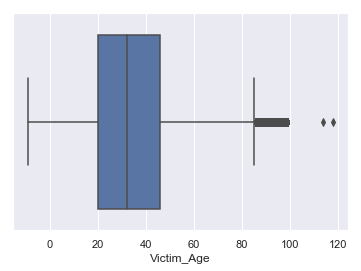

In [54]:
sns.boxplot(df['Victim_Age'])

In [55]:
Q1 = df["Victim_Age"]. quantile(0.25)
Q3 = df["Victim_Age"]. quantile(0.75)
IQR = Q3 - Q1
print(IQR)

26.0


In [56]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-19.0
85.0


In [57]:
df= df[~((df ["Victim_Age"] < Lower_Fence) | (df["Victim_Age"] > Upper_Fence))]
df

DR_NO Date_Occured Date_Reported  Time_Occured  Area_ID  \
0          1307355   2010-02-20    2010-02-20          1350       13   
1         11401303   2010-09-12    2010-09-13            45       14   
2         70309629   2010-08-09    2010-08-09          1515       13   
3         90631215   2010-01-05    2010-01-05           150        6   
4        100100501   2010-01-02    2010-01-03          2100        1   
5        100100506   2010-01-04    2010-01-05          1650        1   
6        100100508   2010-01-07    2010-01-08          2005        1   
7        100100509   2010-01-08    2010-01-09          2100        1   
8        100100510   2010-01-09    2010-01-09           230        1   
9        100100511   2010-01-06    2010-01-09          2100        1   
10       100100521   2010-01-14    2010-01-14          1445        1   
11       100100522   2010-01-14    2010-01-15          2000        1   
12       100100523   2010-01-15    2010-01-15           245        1   
13       100100529   2010-01-15    2010-01-16          1745        1   
14       100100531   2010-01-15    2010-01-16          2030        1   
15       100100535   2010-01-16    2010-01-17          1735        1   
16       100100552   2010-01-23    2010-01-23          1225        1   
17       100100553   2010-01-23    2010-01-23          1100        1   
18       100100555   2010-01-23    2010-01-23          2000        1   
19       100100561   2010-01-26    2010-01-26          1820        1   
20       100100562   2010-01-28    2010-01-28          2345        1   
21       100100564   2010-01-29    2010-01-30          1630        1   
22       100100570   2010-01-31    2010-01-31           130        1   
23       100100571   2010-01-31    2010-01-31          1000        1   
24       100100572   2010-01-31    2010-02-01          1700        1   
25       100100573   2010-01-31    2010-02-01          2200        1   
26       100100574   2010-01-31    2010-02-01          1930        1   
27       100100575   2010-01-31    2010-02-01          1720        1   
28       100100578   2010-02-03    2010-02-05          1255        1   
29       100100580   2010-02-01    2010-02-02          1355        1   
...            ...          ...           ...           ...      ...   
2109722  101215049   2010-05-22    2010-05-22          2350       12   
2109723  101310370   2010-04-08    2010-04-08          1215       13   
2109724  101422415   2010-10-05    2010-10-05           500       14   
2109725  101404306   2010-01-04    2010-01-06          2115       14   
2109726  101412283   2010-05-06    2010-05-08          1200       14   
2109727  101405100   2010-01-18    2010-01-18          1930       14   
2109728  101409528   2010-03-29    2010-03-29          2040       14   
2109729  101410283   2010-04-10    2010-04-10          1450       14   
2109730  101415652   2010-06-28    2010-06-28          1700       14   
2109731  101419184   2010-08-20    2010-08-20          1625       14   
2109732  101426248   2010-11-21    2010-11-21          1454       14   
2109733  101426663   2010-11-26    2010-11-27          1700       14   
2109734  101423944   2010-10-19    2010-10-20          1415       14   
2109735  101419831   2010-08-30    2010-08-30          1845       14   
2109736  101416893   2010-07-18    2010-07-18          1530       14   
2109737  101414811   2010-06-15    2010-06-15          1035       14   
2109738  101423147   2010-10-12    2010-10-13          1830       14   
2109739  101414053   2010-06-02    2010-06-05          1955       14   
2109740  101414880   2010-06-16    2010-06-17          1815       14   
2109741  101412391   2010-03-26    2010-03-26           530       14   
2109742  101421063   2010-09-17    2010-09-18           930       14   
2109743  101416664   2010-07-13    2010-07-13          2135       14   
2109744  101408510   2010-03-14    2010-03-14            15       14   
2109745  100213114   2010-06-14    2010-06-14        

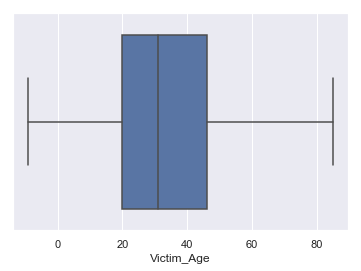

In [58]:
sns.boxplot(df['Victim_Age'])

new visusal confirms that the outlier data was successfully removed. 

In [59]:
## Also dropping victim descent due to possible questions related to ethics 

In [60]:
#Sorting data by time the crime occured by area. 
Area_Name.mean().sort_values(by="Time_Occured",ascending=False).head()

DR_NO  Time_Occured  Area_ID  Reporting_Disc  Crime_Code  \
Area_Name                                                                     
Hollenbeck  1.485633e+08   1395.359814      4.0      448.598194  525.572755   
Mission     1.468761e+08   1384.909853     19.0     1956.674206  522.420600   
Topanga     1.487884e+08   1382.009669     21.0     2147.900311  504.646199   
Northeast   1.465961e+08   1380.264444     11.0     1142.735526  512.478782   
Foothill    1.462174e+08   1375.865577     16.0     1649.798517  516.577110   

            Crime_Code1  Victim_Age  Premesis_Code  Weapon_Code   Latitude  \
Area_Name                                                                    
Hollenbeck   525.376006   27.242971     287.910757   385.366939  34.033219   
Mission      522.193314   30.053385     311.085178   389.628842  34.241819   
Topanga      504.346660   36.630170     342.286643   397.966873  34.182869   
Northeast    512.338076   31.222138     307.271593   392.756284  34.093378   
Foothill     516.395085   31.379876     298.017497   389.777688  34.241531   

             Longitude  Crime_Code2  Hours to Report         Year     Month  \
Area_Name                                                                     
Hollenbeck -118.122954   503.341950       413.537773  2014.766379  6.474432   
Mission    -118.399585   506.481541       559.280139  2014.434472  6.460927   
Topanga    -118.565747   493.513578       492.134521  2014.611613  6.525508   
Northeast  -118.190260   496.058664       454.833717  2014.497420  6.478812   
Foothill   -118.352346   503.784778       615.449236  2014.391616  6.432317   

            Week_Day        Day  
Area_Name                        
Hollenbeck  3.045657  15.480027  
Mission     3.019442  15.405382  
Topanga     2.973141  15.374064  
Northeast   3.005579  15.490361  
Foothill    3.001973  15.337553

In [61]:
# find the number of unique rows in the dataset 
df['DR_NO'].nunique()

2100712

In [62]:
df.shape

(2100712, 34)

Time_Occured    1361.170227
Victim_Age        31.538236
dtype: float64

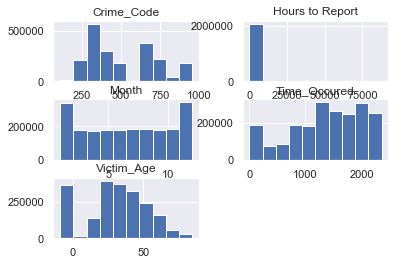

In [63]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)

df[['Time_Occured', 'Victim_Age', 'Crime_Code', 'Hours to Report', 'Month']].hist()
df[['Time_Occured', 'Victim_Age']].mean()

### Data Visualization 

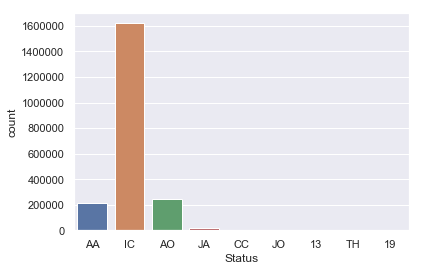

In [64]:
sns.countplot(x="Status", data=df)  # count by status

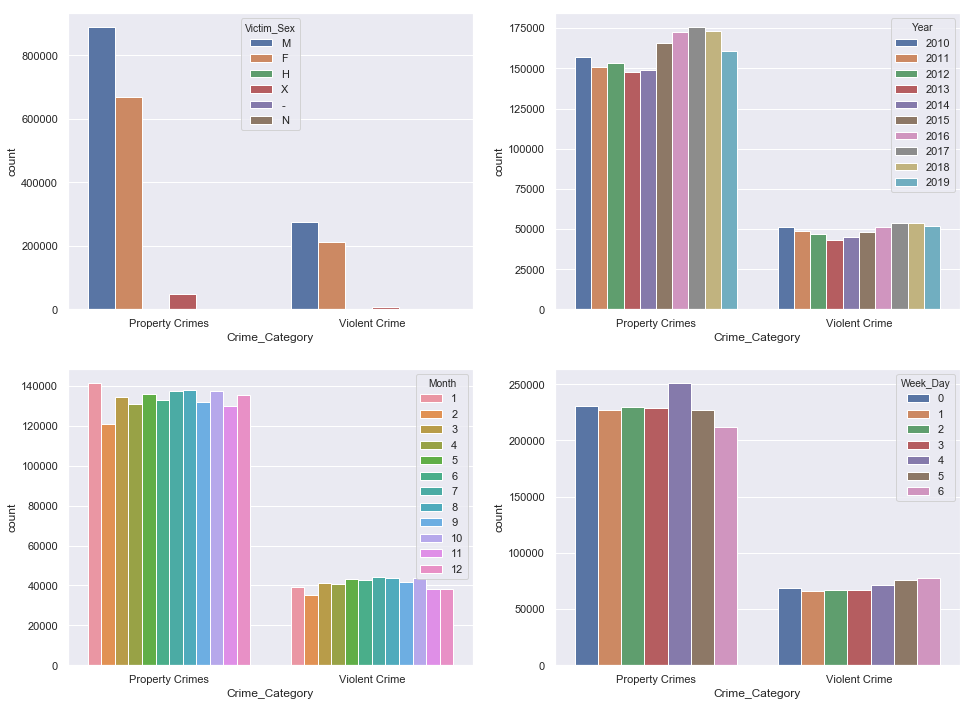

In [65]:
#graph individual features by crime_type
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Crime_Category', hue="Victim_Sex", data=df,ax = saxis[0,0])   
sns.countplot(x='Crime_Category', hue="Year", data=df,ax = saxis[0,1])
sns.countplot(x="Crime_Category", hue="Month", data=df, ax = saxis[1,0])
sns.countplot(x="Crime_Category", hue="Week_Day", data=df, ax = saxis[1,1])

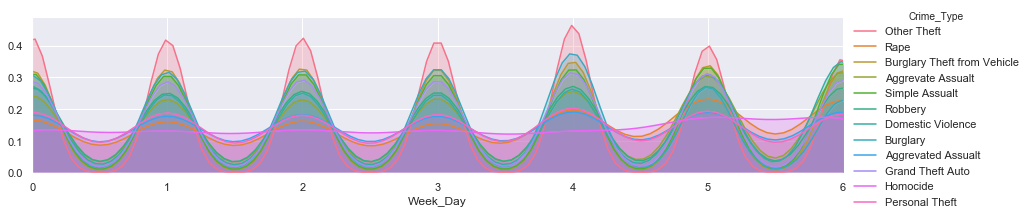

In [66]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( df, hue = 'Crime_Type', aspect=4 )
a.map(sns.kdeplot, 'Week_Day', shade= True )
a.set(xlim=(0 , df['Week_Day'].max()))
a.add_legend()

In [67]:
HoursToReport = df.groupby(['Area_Name', 'Status_Desc', ])['Hours to Report'].median().to_frame(name = 'Hours to Report').reset_index()
HoursToReport.head(10)

Area_Name   Status_Desc  Hours to Report
0  77th Street  Adult Arrest              0.0
1  77th Street   Adult Other              0.0
2  77th Street   Invest Cont             24.0
3  77th Street    Juv Arrest              0.0
4  77th Street     Juv Other             24.0
5  77th Street           UNK             48.0
6      Central  Adult Arrest              0.0
7      Central   Adult Other              0.0
8      Central   Invest Cont              0.0
9      Central    Juv Arrest              0.0

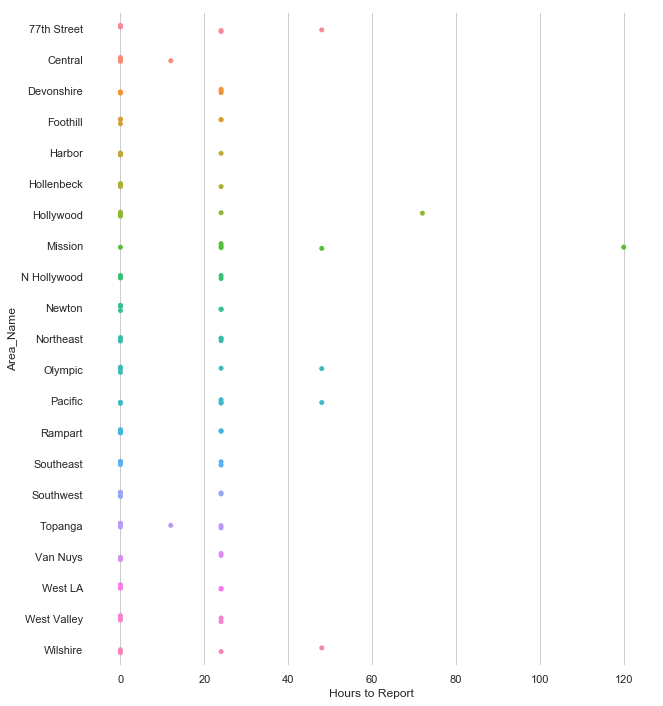

In [68]:
sns.set(style="whitegrid")

# initialize the figure
fig_dim = (10,12)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Hours to Report", y="Area_Name",
              data=HoursToReport, dodge=True, jitter=True
            )
plt.show()

In [69]:
HoursToReport = df.groupby(['Area_Name', 'Status_Desc', ])['Time_Occured'].mean().to_frame(name = 'Time_Occured').reset_index()
HoursToReport.head(10)

Area_Name   Status_Desc  Time_Occured
0  77th Street  Adult Arrest   1343.551610
1  77th Street   Adult Other   1348.795410
2  77th Street   Invest Cont   1358.704858
3  77th Street    Juv Arrest   1356.611670
4  77th Street     Juv Other   1326.989011
5  77th Street           UNK   1364.444444
6      Central  Adult Arrest   1299.926672
7      Central   Adult Other   1278.598038
8      Central   Invest Cont   1323.460964
9      Central    Juv Arrest   1529.635628

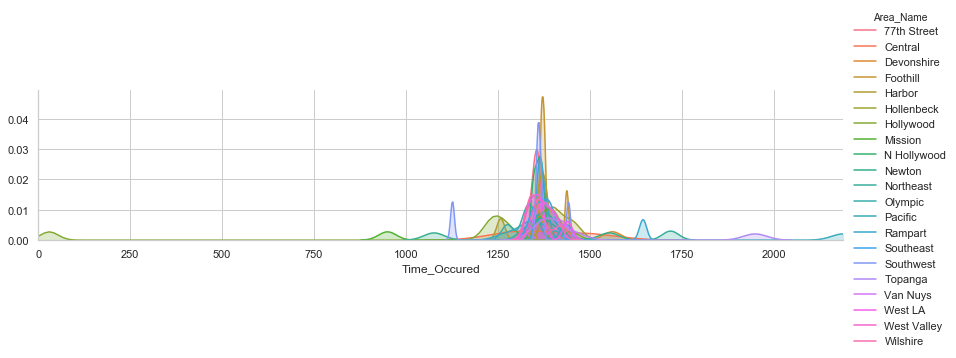

In [70]:
#plot distributions of Time crime occurs 
a = sns.FacetGrid(HoursToReport, hue = 'Area_Name', aspect=4 )
a.map(sns.kdeplot, 'Time_Occured', shade= True )
a.set(xlim=(0 , HoursToReport['Time_Occured'].max()))
a.add_legend()

In [71]:
DayofWeek = df.groupby(['Status_Desc', 'Week_Day', ])['Hours to Report'].mean().to_frame(name = 'Hours to Report').reset_index()
DayofWeek.head(10)

Status_Desc  Week_Day  Hours to Report
0  Adult Arrest         0       200.845439
1  Adult Arrest         1       237.847076
2  Adult Arrest         2       215.846581
3  Adult Arrest         3       225.613282
4  Adult Arrest         4       288.636222
5  Adult Arrest         5       228.055025
6  Adult Arrest         6       193.681016
7   Adult Other         0       432.692935
8   Adult Other         1       559.235901
9   Adult Other         2       534.957164

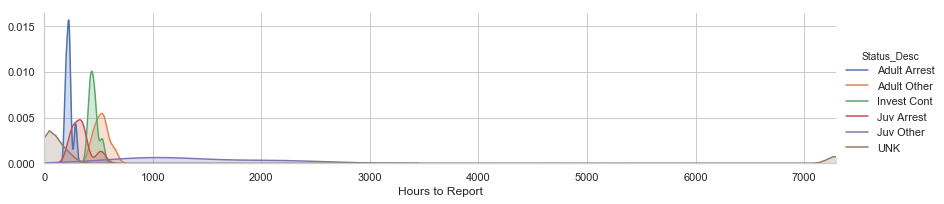

In [72]:
#plot distributions of week day 
a = sns.FacetGrid(DayofWeek, hue = 'Status_Desc', aspect=4 )
a.map(sns.kdeplot, 'Hours to Report', shade= True )
a.set(xlim=(0 , DayofWeek['Hours to Report'].max()))
a.add_legend()

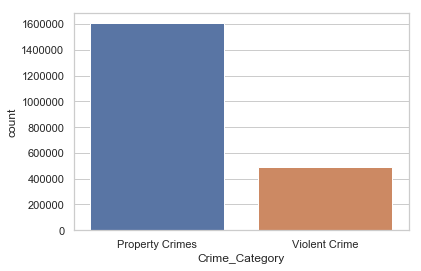

In [73]:
#plot distributions of Crime Category
sns.countplot(x="Crime_Category", data=df)  # count by status

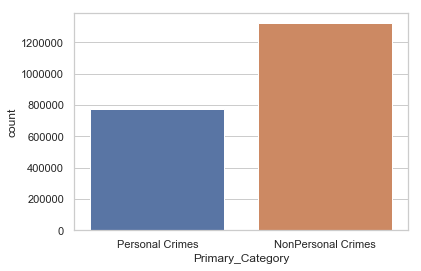

In [74]:
#plot distributions of Crime Category
sns.countplot(x="Primary_Category", data=df)  # count by category

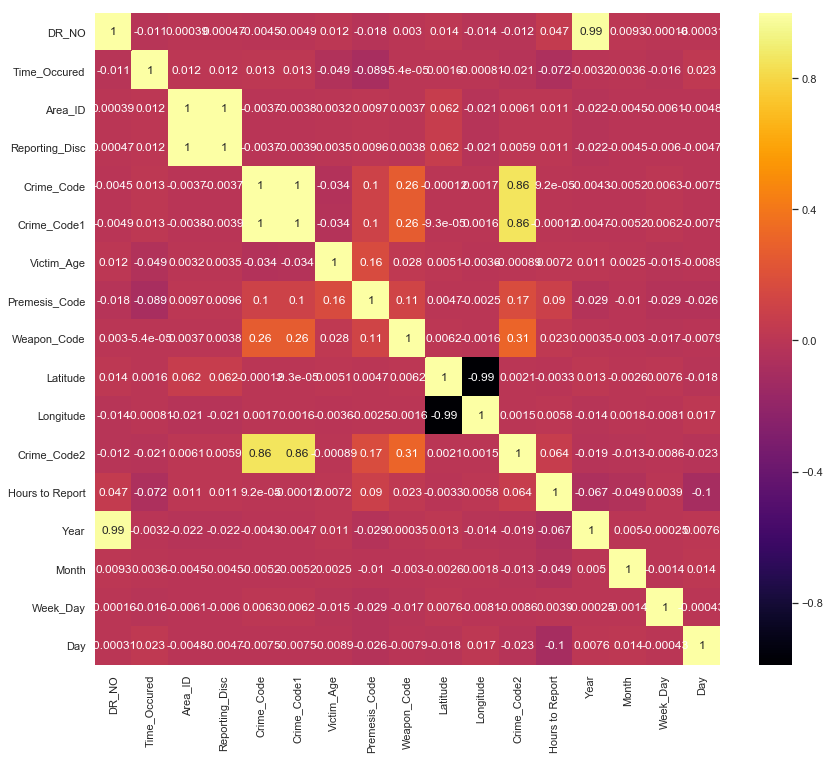

In [75]:
# Dataframe correlation
del_corr = df.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

In [76]:
#Find categorical data and convert to numeric for machine learning modeling
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical

Date_Occured Date_Reported    Area_Name  \
0         2010-02-20    2010-02-20       Newton   
1         2010-09-12    2010-09-13      Pacific   
2         2010-08-09    2010-08-09       Newton   
3         2010-01-05    2010-01-05    Hollywood   
4         2010-01-02    2010-01-03      Central   
5         2010-01-04    2010-01-05      Central   
6         2010-01-07    2010-01-08      Central   
7         2010-01-08    2010-01-09      Central   
8         2010-01-09    2010-01-09      Central   
9         2010-01-06    2010-01-09      Central   
10        2010-01-14    2010-01-14      Central   
11        2010-01-14    2010-01-15      Central   
12        2010-01-15    2010-01-15      Central   
13        2010-01-15    2010-01-16      Central   
14        2010-01-15    2010-01-16      Central   
15        2010-01-16    2010-01-17      Central   
16        2010-01-23    2010-01-23      Central   
17        2010-01-23    2010-01-23      Central   
18        2010-01-23    2010-01-23      Central   
19        2010-01-26    2010-01-26      Central   
20        2010-01-28    2010-01-28      Central   
21        2010-01-29    2010-01-30      Central   
22        2010-01-31    2010-01-31      Central   
23        2010-01-31    2010-01-31      Central   
24        2010-01-31    2010-02-01      Central   
25        2010-01-31    2010-02-01      Central   
26        2010-01-31    2010-02-01      Central   
27        2010-01-31    2010-02-01      Central   
28        2010-02-03    2010-02-05      Central   
29        2010-02-01    2010-02-02      Central   
...              ...           ...          ...   
2109722   2010-05-22    2010-05-22  77th Street   
2109723   2010-04-08    2010-04-08       Newton   
2109724   2010-10-05    2010-10-05      Pacific   
2109725   2010-01-04    2010-01-06      Pacific   
2109726   2010-05-06    2010-05-08      Pacific   
2109727   2010-01-18    2010-01-18      Pacific   
2109728   2010-03-29    2010-03-29      Pacific   
2109729   2010-04-10    2010-04-10      Pacific   
2109730   2010-06-28    2010-06-28      Pacific   
2109731   2010-08-20    2010-08-20      Pacific   
2109732   2010-11-21    2010-11-21      Pacific   
2109733   2010-11-26    2010-11-27      Pacific   
2109734   2010-10-19    2010-10-20      Pacific   
2109735   2010-08-30    2010-08-30      Pacific   
2109736   2010-07-18    2010-07-18      Pacific   
2109737   2010-06-15    2010-06-15      Pacific   
2109738   2010-10-12    2010-10-13      Pacific   
2109739   2010-06-02    2010-06-05      Pacific   
2109740   2010-06-16    2010-06-17      Pacific   
2109741   2010-03-26    2010-03-26      Pacific   
2109742   2010-09-17    2010-09-18      Pacific   
2109743   2010-07-13    2010-07-13      Pacific   
2109744   2010-03-14    2010-03-14      Pacific   
2109745   2010-06-14    2010-06-14      Rampart   
2109746   2010-03-17    2010-03-17      Pacific   
2109747   2010-07-09    2010-07-09     Wilshire   
2109748   2010-10-29    2010-10-29     Wilshire   
2109749   2010-09-09    2010-09-09     Wilshire   
2109750   2010-05-10    2010-05-21     Wilshire   
2109751   2010-01-12    2010-01-12     Van Nuys   

                                                Crime_Desc  \
0                                 VIOLATION OF COURT ORDER   
1        VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
2                                OTHER MISCELLANEOUS CRIME   
3                                 VIOLATION OF COURT ORDER   
4                                          RAPE, ATTEMPTED   
5                 SHOPLIFTING - PETTY THEFT ($950 & UNDER)   
6                                    BURGLARY FROM VEHICLE   
7           ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
8           ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
9        THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...   
10                                BATTERY - SIMPLE ASSAULT   
11                                                 ROBBERY   
12       VANDALISM - FELONY ($400 & OVE

In [77]:
#Convert categorical data to numeric 
from sklearn.preprocessing import LabelEncoder
#
label_encoder=LabelEncoder()
for i in df_categorical:
    df[i] = label_encoder.fit_transform(df[i])
    print("Label Encoded Data: ")
    df.head

Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 


In [78]:
df.head()

DR_NO  Date_Occured  Date_Reported  Time_Occured  Area_ID  Area_Name  \
0    1307355            50             50          1350       13          9   
1   11401303           254            255            45       14         12   
2   70309629           220            220          1515       13          9   
3   90631215             4              4           150        6          6   
4  100100501             1              2          2100        1          1   

   Reporting_Disc  Crime_Code  Crime_Desc  Crime_Code1        ...         \
0            1385         900         137        900.0        ...          
1            1485         740         132        740.0        ...          
2            1324         946          86        946.0        ...          
3             646         900         137        900.0        ...          
4             176         122          96        122.0        ...          

   Crime_Type  Crime_Code2  Description  Days to Report  Hours to Report  \
0           7        624.0           53          0 days              0.0   
1           7        624.0           53          1 days             24.0   
2           7        624.0           53          0 days              0.0   
3           7        624.0           53          0 days              0.0   
4           9        122.0            3          1 days             24.0   

   Year  Month  Week_Day  Day  Primary_Category  
0  2010      2         5   20                 1  
1  2010      9         6   12                 0  
2  2010      8         0    9                 0  
3  2010      1         1    5                 1  
4  2010      1         5    2                 1  

[5 rows x 34 columns]

In [79]:
print(df.isna().sum())

DR_NO               0
Date_Occured        0
Date_Reported       0
Time_Occured        0
Area_ID             0
Area_Name           0
Reporting_Disc      0
Crime_Code          0
Crime_Desc          0
Crime_Code1         0
Mocodes             0
Victim_Age          0
Victim_Sex          0
Victim_Descent      0
Premesis_Code       0
Premesis_Desc       0
Weapon_Code         0
Weapon_Desc         0
Status              0
Status_Desc         0
Location            0
Latitude            0
Longitude           0
Crime_Category      0
Crime_Type          0
Crime_Code2         0
Description         0
Days to Report      0
Hours to Report     0
Year                0
Month               0
Week_Day            0
Day                 0
Primary_Category    0
dtype: int64


In [80]:
df1 = df.drop(columns =['DR_NO', 'Area_ID', 'Reporting_Disc','Crime_Code1','Premesis_Code','Weapon_Code','Status',
                       'Latitude','Longitude','Crime_Code2','Days to Report','Year']) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100712 entries, 0 to 2109751
Data columns (total 22 columns):
Date_Occured        int64
Date_Reported       int64
Time_Occured        int64
Area_Name           int32
Crime_Code          int64
Crime_Desc          int32
Mocodes             int32
Victim_Age          int64
Victim_Sex          int32
Victim_Descent      int32
Premesis_Desc       int32
Weapon_Desc         int32
Status_Desc         int32
Location            int32
Crime_Category      int32
Crime_Type          int32
Description         int32
Hours to Report     float64
Month               int64
Week_Day            int64
Day                 int64
Primary_Category    int32
dtypes: float64(1), int32(13), int64(8)
memory usage: 264.4 MB


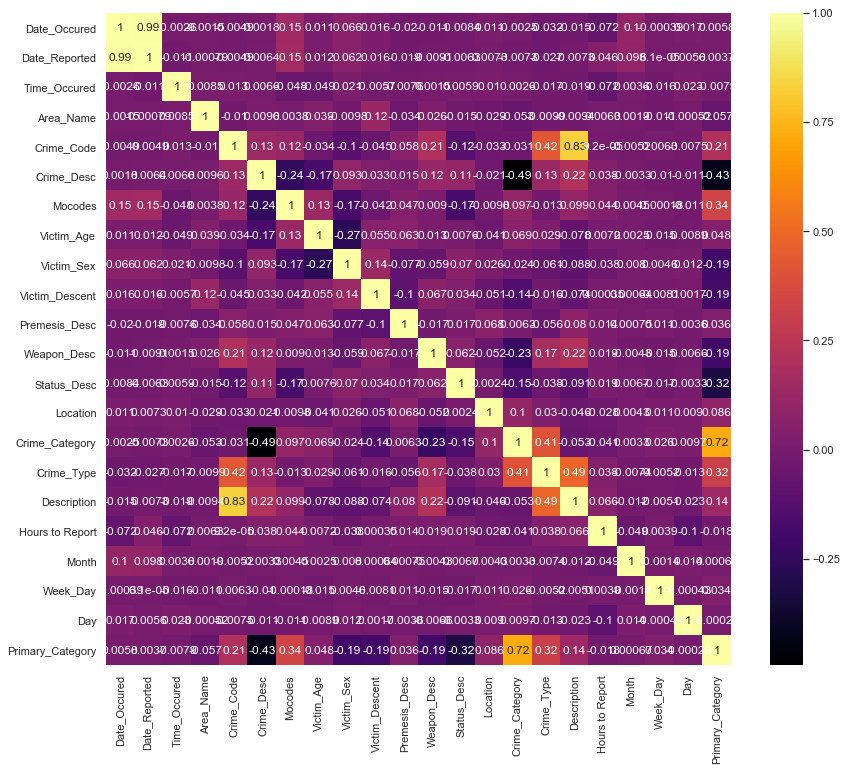

In [81]:
# Dataframe correlation
del_corr = df1.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

In [82]:
df2 = df1.sample(frac =.75) 

### Select Features and Target 

In [83]:
X = df2.drop(['Crime_Category'], axis=1)
X.shape
X.head()

Date_Occured  Date_Reported  Time_Occured  Area_Name  Crime_Code  \
1183760          2919           2934          1400         16         341   
1631345          2337           2351          1500         19         354   
1265986          2310           2310          2250          1         210   
839761            783            783          1930          9         624   
1940979          3631           3632          1300         10         740   

         Crime_Desc  Mocodes  Victim_Age  Victim_Sex  Victim_Descent  \
1183760         123   113614          50           1              19   
1631345         116   305487          35           1               9   
1265986         101   472338          39           3               9   
839761            5   297843          52           3               9   
1940979         132    55419          34           3              19   

               ...         Weapon_Desc  Status_Desc  Location  Crime_Type  \
1183760        ...                  65            2     54961           7   
1631345        ...                  65            2     48146           7   
1265986        ...                  65            2     57318          10   
839761         ...                  75            2     43665          11   
1940979        ...                  65            2     68216           7   

         Description  Hours to Report  Month  Week_Day  Day  Primary_Category  
1183760           16            360.0     12         4   29                 0  
1631345           53            336.0      5         3   26                 0  
1265986            4              0.0      4         4   29                 1  
839761            53              0.0      2         3   23                 1  
1940979           53             24.0     12         2   11                 0  

[5 rows x 21 columns]

In [84]:
y= df2['Crime_Category']
y.shape
y.head()

1183760    0
1631345    0
1265986    1
839761     1
1940979    0
Name: Crime_Category, dtype: int32

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1102873, 21)
X_test: (472661, 21)
Y_train: (1102873,)
Y_test: (472661,)


### Execute Machine Learning Models

### K-Nearest Neighbours 
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. 

In [87]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_predKN = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
accuracy_score(y_test, y_predKN.round(), normalize=False)

print(classification_report(y_test, y_predKN))
print(confusion_matrix(y_test, y_predKN))
print("Accuracy:",accuracy_score(y_predKN,y_test))
print("Precision:",metrics.precision_score(y_test, y_predKN))
print("Recall:",metrics.recall_score(y_test, y_predKN))

KNN = accuracy_score(y_predKN,y_test)
KNNp = metrics.precision_score(y_test, y_predKN)
KNNr = metrics.recall_score(y_test, y_predKN)
cmf= confusion_matrix(y_test, y_predKN)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93    361554
           1       0.82      0.70      0.75    111107

   micro avg       0.89      0.89      0.89    472661
   macro avg       0.87      0.83      0.84    472661
weighted avg       0.89      0.89      0.89    472661

[[344333  17221]
 [ 33326  77781]]
Accuracy: 0.8930586614931209
Precision: 0.8187301319972211
Recall: 0.7000549020313752


### Decision Tree
Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [88]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_predDT = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predDT))
print(confusion_matrix(y_test, y_predDT))
print("Accuracy:",accuracy_score(y_predDT,y_test))
print("Precision:",metrics.precision_score(y_test, y_predDT))
print("Recall:",metrics.recall_score(y_test, y_predDT))


DT = accuracy_score(y_predDT,y_test)
DTp = metrics.precision_score(y_test, y_predDT)
DTr = metrics.recall_score(y_test, y_predDT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    361554
           1       1.00      1.00      1.00    111107

   micro avg       1.00      1.00      1.00    472661
   macro avg       1.00      1.00      1.00    472661
weighted avg       1.00      1.00      1.00    472661

[[361554      0]
 [     0 111107]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [89]:
from sklearn.metrics import roc_curve, auc

In [90]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predDT)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

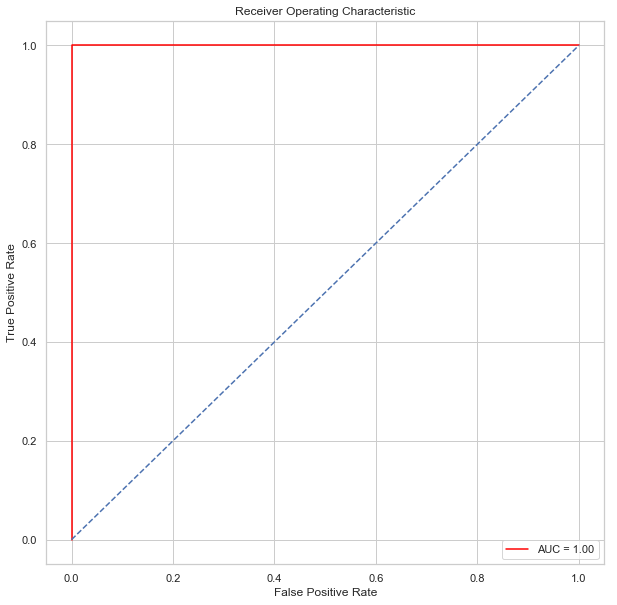

In [91]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### RandomForest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [92]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train, y_train)
y_predR=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predR))
print(confusion_matrix(y_predR,y_test))
print("Accuracy:",accuracy_score(y_predR,y_test))
print("Precision:",metrics.precision_score(y_test, y_predR))
print("Recall:",metrics.recall_score(y_test, y_predR))

RT = accuracy_score(y_predR,y_test)
RTp = metrics.precision_score(y_test, y_predR)
RTr = metrics.recall_score(y_test, y_predR)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    361554
           1       1.00      0.82      0.90    111107

   micro avg       0.96      0.96      0.96    472661
   macro avg       0.97      0.91      0.94    472661
weighted avg       0.96      0.96      0.96    472661

[[361549  20185]
 [     5  90922]]
Accuracy: 0.9572843962163157
Precision: 0.9999450108328659
Recall: 0.8183282781462914


### Logistic Regression 
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X..


In [93]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_predLR = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predLR))
print(confusion_matrix(y_test, y_predLR))
print("Accuracy:",accuracy_score(y_predLR,y_test))
print("Precision:",metrics.precision_score(y_test, y_predLR))
print("Recall:",metrics.recall_score(y_test, y_predLR))


LR = accuracy_score(y_predLR,y_test)
LRp = metrics.precision_score(y_test, y_predLR)
LRr = metrics.recall_score(y_test, y_predLR)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    361554
           1       0.92      0.72      0.81    111107

   micro avg       0.92      0.92      0.92    472661
   macro avg       0.92      0.85      0.88    472661
weighted avg       0.92      0.92      0.92    472661

[[355074   6480]
 [ 31606  79501]]
Accuracy: 0.9194221651458445
Precision: 0.9246345122759679
Recall: 0.7155354748125681


###  Naïve Bayes
Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

In [94]:
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_predN = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predN))
print(confusion_matrix(y_test, y_predN))
print("Accuracy:" ,accuracy_score(y_predN,y_test))
print("Precision:",metrics.precision_score(y_test, y_predN))
print("Recall:",metrics.recall_score(y_test, y_predN))


NBB = accuracy_score(y_predN,y_test)
NBBp = metrics.precision_score(y_test, y_predN)
NBBr = metrics.recall_score(y_test, y_predN)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    361554
           1       0.92      0.58      0.71    111107

   micro avg       0.89      0.89      0.89    472661
   macro avg       0.90      0.78      0.82    472661
weighted avg       0.89      0.89      0.88    472661

[[355747   5807]
 [ 46473  64634]]
Accuracy: 0.8893921859429909
Precision: 0.917562215187178
Recall: 0.581727523918385


## ROC Curve 

In [95]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predN)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
roc_auc1

0.7828331496578489

Text(0.5, 0, 'False Positive Rate')

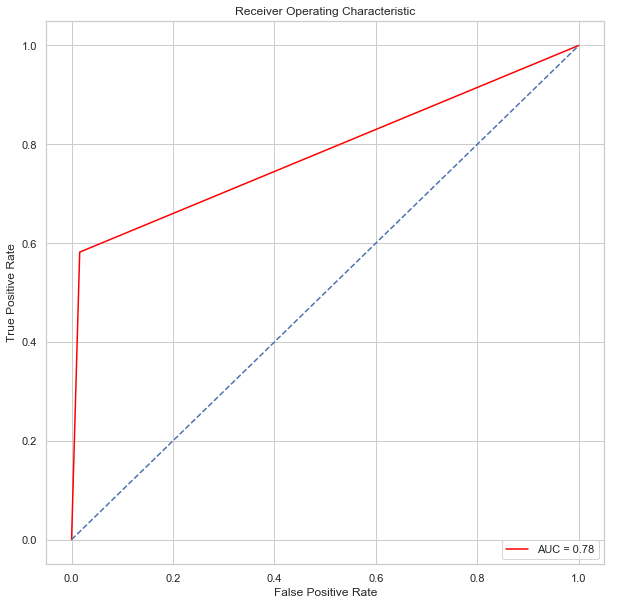

In [96]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Bagging Classifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [97]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train, y_train)
y_predBC=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predBC))
print(confusion_matrix(y_predBC,y_test))
print("Accuracy:",accuracy_score(y_predBC,y_test))
print("Precision:",metrics.precision_score(y_test, y_predBC))
print("Recall:",metrics.recall_score(y_test, y_predBC))

BCC = accuracy_score(y_predBC,y_test)
BCCp = metrics.precision_score(y_test, y_predBC)
BCCr = metrics.recall_score(y_test, y_predBC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    361554
           1       1.00      1.00      1.00    111107

   micro avg       1.00      1.00      1.00    472661
   macro avg       1.00      1.00      1.00    472661
weighted avg       1.00      1.00      1.00    472661

[[361554      0]
 [     0 111107]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### AdaBoost Classifier
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [98]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train, y_train)
y_predAD=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predAD))
print(confusion_matrix(y_predAD,y_test))
print("Accuracy:",accuracy_score(y_predAD,y_test))
print("Precision:",metrics.precision_score(y_test, y_predAD))
print("Recall:",metrics.recall_score(y_test, y_predAD))

Abc = accuracy_score(y_predAD,y_test)
Abcp = metrics.precision_score(y_test, y_predAD)
Abcr = metrics.recall_score(y_test, y_predAD)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    361554
           1       1.00      1.00      1.00    111107

   micro avg       1.00      1.00      1.00    472661
   macro avg       1.00      1.00      1.00    472661
weighted avg       1.00      1.00      1.00    472661

[[361554      0]
 [     0 111107]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Linear Discriminat Analysis
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train, y_train)
y_predLD=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predLD))
print(confusion_matrix(y_predLD,y_test))
print("Accuracy:",accuracy_score(y_predLD,y_test))
print("Precision:",metrics.precision_score(y_test, y_predLD))
print("Recall:",metrics.recall_score(y_test, y_predLD))

LDAA = accuracy_score(y_predLD,y_test)
LDAAp = metrics.precision_score(y_test, y_predLD)
LDAAr = metrics.recall_score(y_test, y_predLD)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    361554
           1       0.88      0.92      0.90    111107

   micro avg       0.95      0.95      0.95    472661
   macro avg       0.93      0.94      0.93    472661
weighted avg       0.95      0.95      0.95    472661

[[348160   9215]
 [ 13394 101892]]
Accuracy: 0.9521665633509006
Precision: 0.8838193709557102
Recall: 0.9170619312914577


### ROC Curve

In [100]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predLD)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
roc_auc2

0.9400081447116498

Text(0.5, 0, 'False Positive Rate')

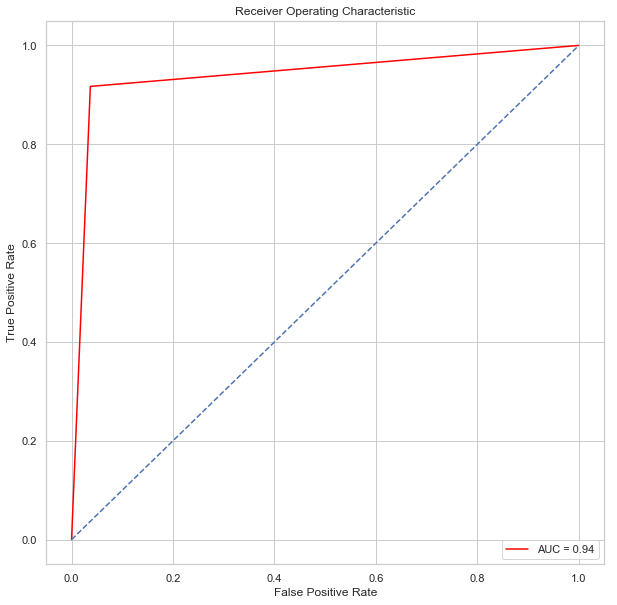

In [101]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

 ### Gradient Boosting Classifier
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(X_train, y_train)
y_predGB=ModelG.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predGB))
print(confusion_matrix(y_predGB,y_test))
print("Accuracy:",accuracy_score(y_predGB,y_test))
print("Precision:",metrics.precision_score(y_test, y_predGB))
print("Recall:",metrics.recall_score(y_test, y_predGB))

GBCC = accuracy_score(y_predGB,y_test)
GBCCp = metrics.precision_score(y_test, y_predGB)
GBCCr = metrics.recall_score(y_test, y_predGB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    361554
           1       1.00      1.00      1.00    111107

   micro avg       1.00      1.00      1.00    472661
   macro avg       1.00      1.00      1.00    472661
weighted avg       1.00      1.00      1.00    472661

[[361554      0]
 [     0 111107]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### ROC Curve

In [103]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predGB)
roc_auc3 = auc(false_positive_rate, true_positive_rate)
roc_auc3

1.0

Text(0.5, 0, 'False Positive Rate')

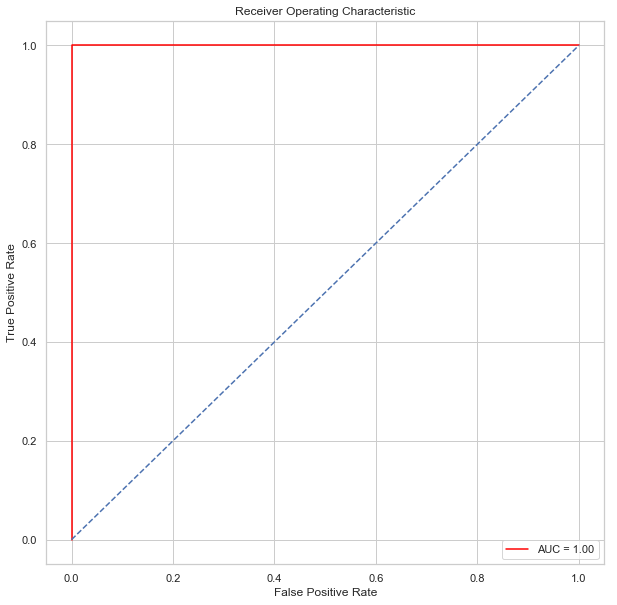

In [104]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


### ExtraTreeClassifier
Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree.

In [105]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_predET = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predET))
print(confusion_matrix(y_test, y_predET))
print("Accuracy:",accuracy_score(y_predET,y_test))
print("Precision:",metrics.precision_score(y_test, y_predET))
print("Recall:",metrics.recall_score(y_test, y_predET))

ETC = accuracy_score(y_predET,y_test)
ETCp = metrics.precision_score(y_test, y_predET)
ETCr = metrics.recall_score(y_test, y_predET)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    361554
           1       1.00      1.00      1.00    111107

   micro avg       1.00      1.00      1.00    472661
   macro avg       1.00      1.00      1.00    472661
weighted avg       1.00      1.00      1.00    472661

[[361544     10]
 [     3 111104]]
Accuracy: 0.9999724961441709
Precision: 0.9999100023399392
Recall: 0.999972999000963


In [106]:
df_confusion2 = pd.crosstab(y_test, y_predET, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion2)

Predicted       0       1     All
Actual                           
0          361544      10  361554
1               3  111104  111107
All        361547  111114  472661


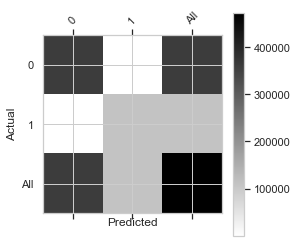

In [107]:
import matplotlib.pyplot as plt
def plot_confusion_matrix2(df_confusion2, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion2, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion2.columns))
    plt.xticks(tick_marks, df_confusion2.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion2.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion2.index.name)
    plt.xlabel(df_confusion2.columns.name)

plot_confusion_matrix2(df_confusion2)


### K-Means Clustering


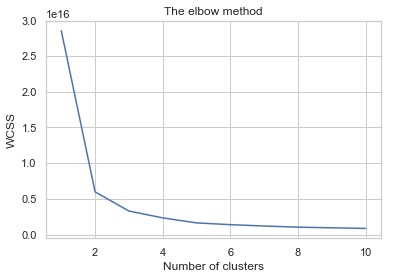

In [108]:
#Find the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [109]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_test)

In [110]:
# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_kmeans))
print(confusion_matrix(y_test, y_kmeans))
print("Accuracy:",accuracy_score(y_kmeans,y_test))
print("Precision:",metrics.precision_score(y_test, y_kmeans))
print("Recall:",metrics.recall_score(y_test, y_kmeans))


KMN = accuracy_score(y_kmeans,y_test)
KMNp = metrics.precision_score(y_test, y_kmeans)
KMNr = metrics.recall_score(y_test, y_kmeans)

              precision    recall  f1-score   support

           0       0.78      0.68      0.73    361554
           1       0.26      0.37      0.31    111107

   micro avg       0.61      0.61      0.61    472661
   macro avg       0.52      0.52      0.52    472661
weighted avg       0.66      0.61      0.63    472661

[[245532 116022]
 [ 70153  40954]]
Accuracy: 0.6061130493101822
Precision: 0.2608933849760473
Recall: 0.3685996381866129


In [111]:
df_confusion = pd.crosstab(y_test, y_kmeans, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted       0       1     All
Actual                           
0          245532  116022  361554
1           70153   40954  111107
All        315685  156976  472661


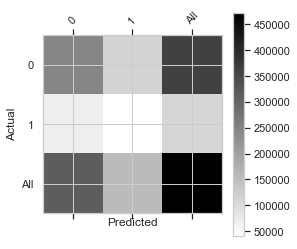

In [112]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [113]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)

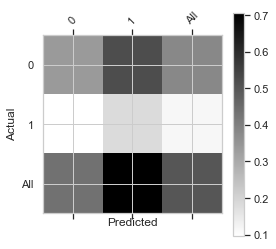

In [114]:
plot_confusion_matrix(df_conf_norm)  

## Support Vector Machine 
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two-dimensional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

   ## Polynomial Kernel

In [115]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [116]:
y_predPK = svclassifier.predict(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predPK))
print(classification_report(y_test, y_predPK))
print("Accuracy:",accuracy_score(y_predPK,y_test))
print("Precision:",metrics.precision_score(y_test, y_predPK))
print("Recall:",metrics.recall_score(y_test, y_predPK))

SVM = accuracy_score(y_predPK,y_test)
SVMp = metrics.precision_score(y_test, y_predPK)
SVMr = metrics.recall_score(y_test, y_predPK)

[[     0 361554]
 [     0 111107]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    361554
           1       0.24      1.00      0.38    111107

   micro avg       0.24      0.24      0.24    472661
   macro avg       0.12      0.50      0.19    472661
weighted avg       0.06      0.24      0.09    472661

Accuracy: 0.23506699304575585
Precision: 0.23506699304575585
Recall: 1.0


## Machine Learning Model Analysis

##### Model Scores 

In [118]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means', 'SVM'],
    'Score': [KNN, DT, RT, LR, NBB, BCC, Abc, LDAA, GBCC, ETC, KMN, SVM]})
models.sort_values(by='Score', ascending=False)



Model     Score
1                  Decision Tree  1.000000
5             Bagging Classifier  1.000000
6            AdaBoost Classifier  1.000000
8   Gradient Boosting Classifier  1.000000
9          Extra Tree Classifier  0.999972
2                  Random Forest  0.957284
7   Linear Discriminant Analysis  0.952167
3            Logistic Regression  0.919422
0           K-Nearest Neighbours  0.893059
4                    Naive Bayes  0.889392
10                       K-Means  0.606113
11                           SVM  0.235067

##### ML Graph 

Text(0, 0.5, 'Algorithm')

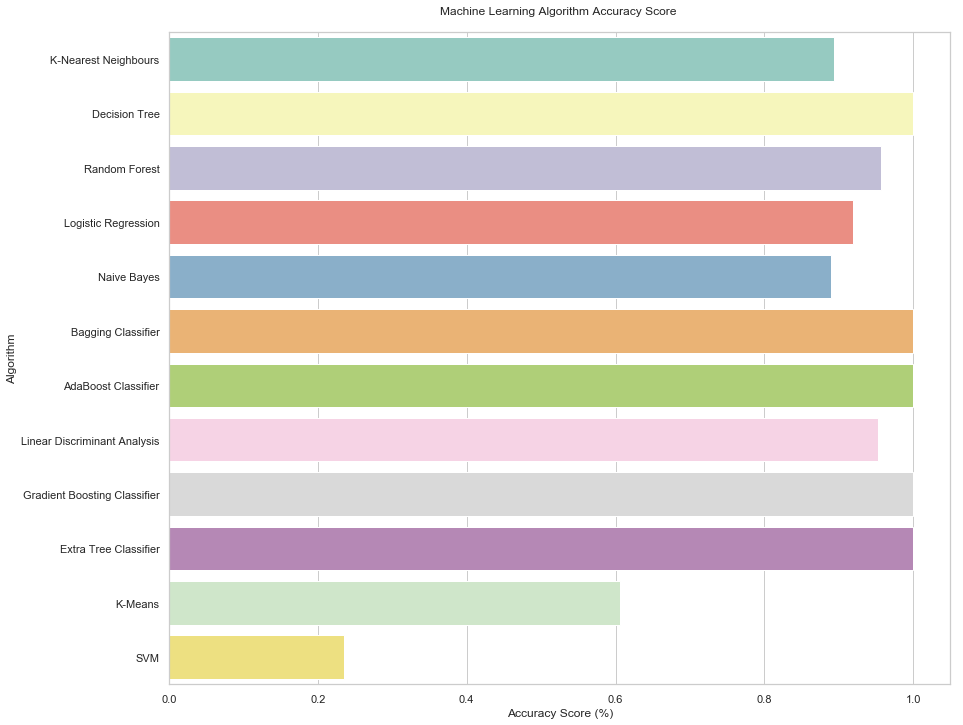

In [119]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

-------------------------------------------------------------------------------------------------------------------------------

#### Model Precision 

In [120]:
precision = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means', 'SVM'],
    'Precision': [KNNp, DTp, RTp, LRp, NBBp, BCCp, Abcp, LDAAp, GBCCp, ETCp, KMNp, SVMp]})
precision.sort_values(by='Precision', ascending=False)


Model  Precision
1                  Decision Tree   1.000000
5             Bagging Classifier   1.000000
6            AdaBoost Classifier   1.000000
8   Gradient Boosting Classifier   1.000000
2                  Random Forest   0.999945
9          Extra Tree Classifier   0.999910
3            Logistic Regression   0.924635
4                    Naive Bayes   0.917562
7   Linear Discriminant Analysis   0.883819
0           K-Nearest Neighbours   0.818730
10                       K-Means   0.260893
11                           SVM   0.235067

Text(0, 0.5, 'Algorithm')

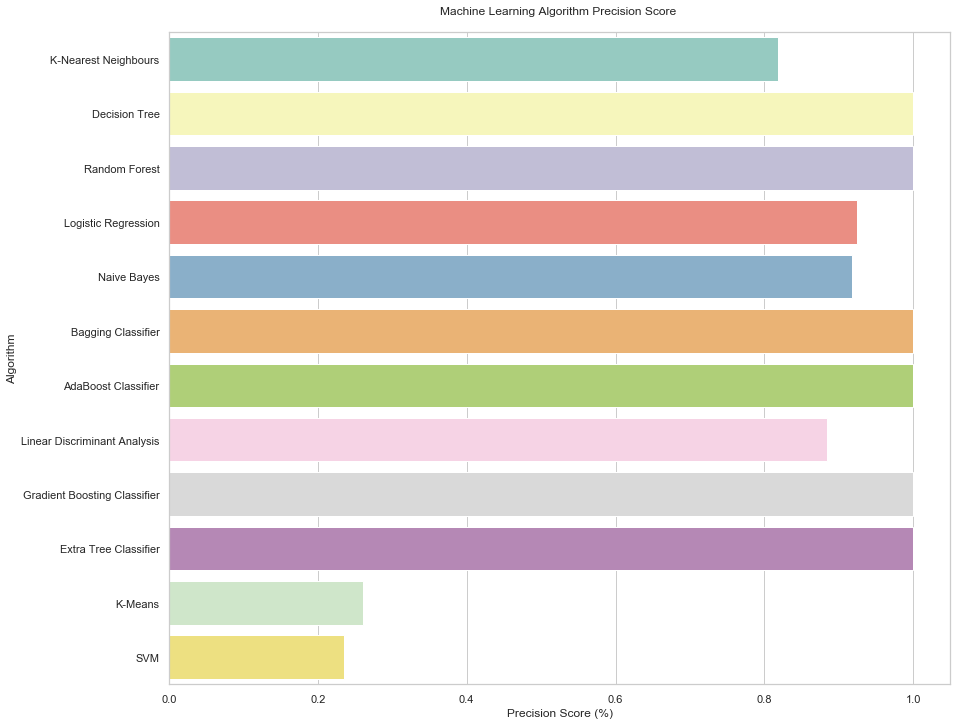

In [121]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Precision', y = 'Model', data = precision, palette="Set3")
plt.title('Machine Learning Algorithm Precision Score \n')
plt.xlabel('Precision Score (%)')
plt.ylabel('Algorithm')

##### Recall

In [122]:
recall = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means', 'SVM'],
    'Recall': [KNNr, DTr, RTr, LRr, NBBr, BCCr, Abcr, LDAAr, GBCCr, ETCr, KMNr, SVMr]})
recall.sort_values(by='Recall', ascending=False)

Model    Recall
1                  Decision Tree  1.000000
5             Bagging Classifier  1.000000
6            AdaBoost Classifier  1.000000
8   Gradient Boosting Classifier  1.000000
11                           SVM  1.000000
9          Extra Tree Classifier  0.999973
7   Linear Discriminant Analysis  0.917062
2                  Random Forest  0.818328
3            Logistic Regression  0.715535
0           K-Nearest Neighbours  0.700055
4                    Naive Bayes  0.581728
10                       K-Means  0.368600

Text(0, 0.5, 'Algorithm')

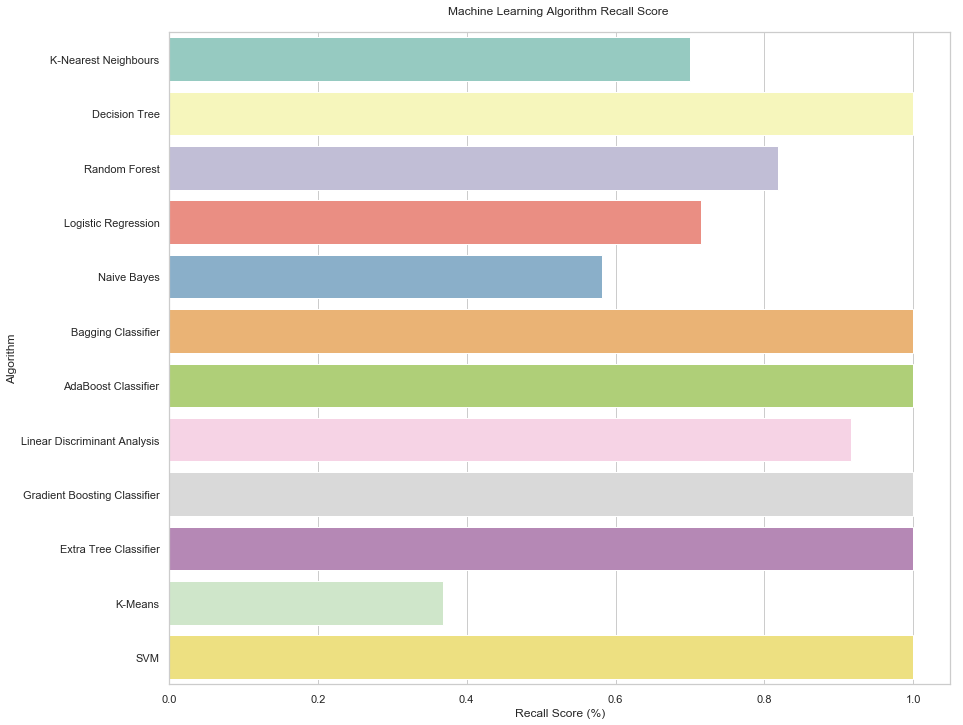

In [123]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Recall', y = 'Model', data = recall, palette="Set3")
plt.title('Machine Learning Algorithm Recall Score \n')
plt.xlabel('Recall Score (%)')
plt.ylabel('Algorithm')

## Final Model Selection Analysis  

## Machine Learning Model Selection 

### Decision Tree II - Alternate Model

In [124]:
## The line / mo
feature_cols = ['Time_Occured','Area_Name','Mocodes','Victim_Age','Victim_Descent',
                'Description','Week_Day','Month','Day','Hours to Report',
                'Crime_Code','Crime_Desc','Premesis_Desc','Weapon_Desc','Location','Crime_Category']
target_cols= ['Primary_Category']

In [125]:
X2 = df2[feature_cols] # Features
#y2 = df3.Crime_Category # Target variable
y2 = df2[target_cols]

In [126]:
# Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1) # 80% training and 30% test

In [127]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

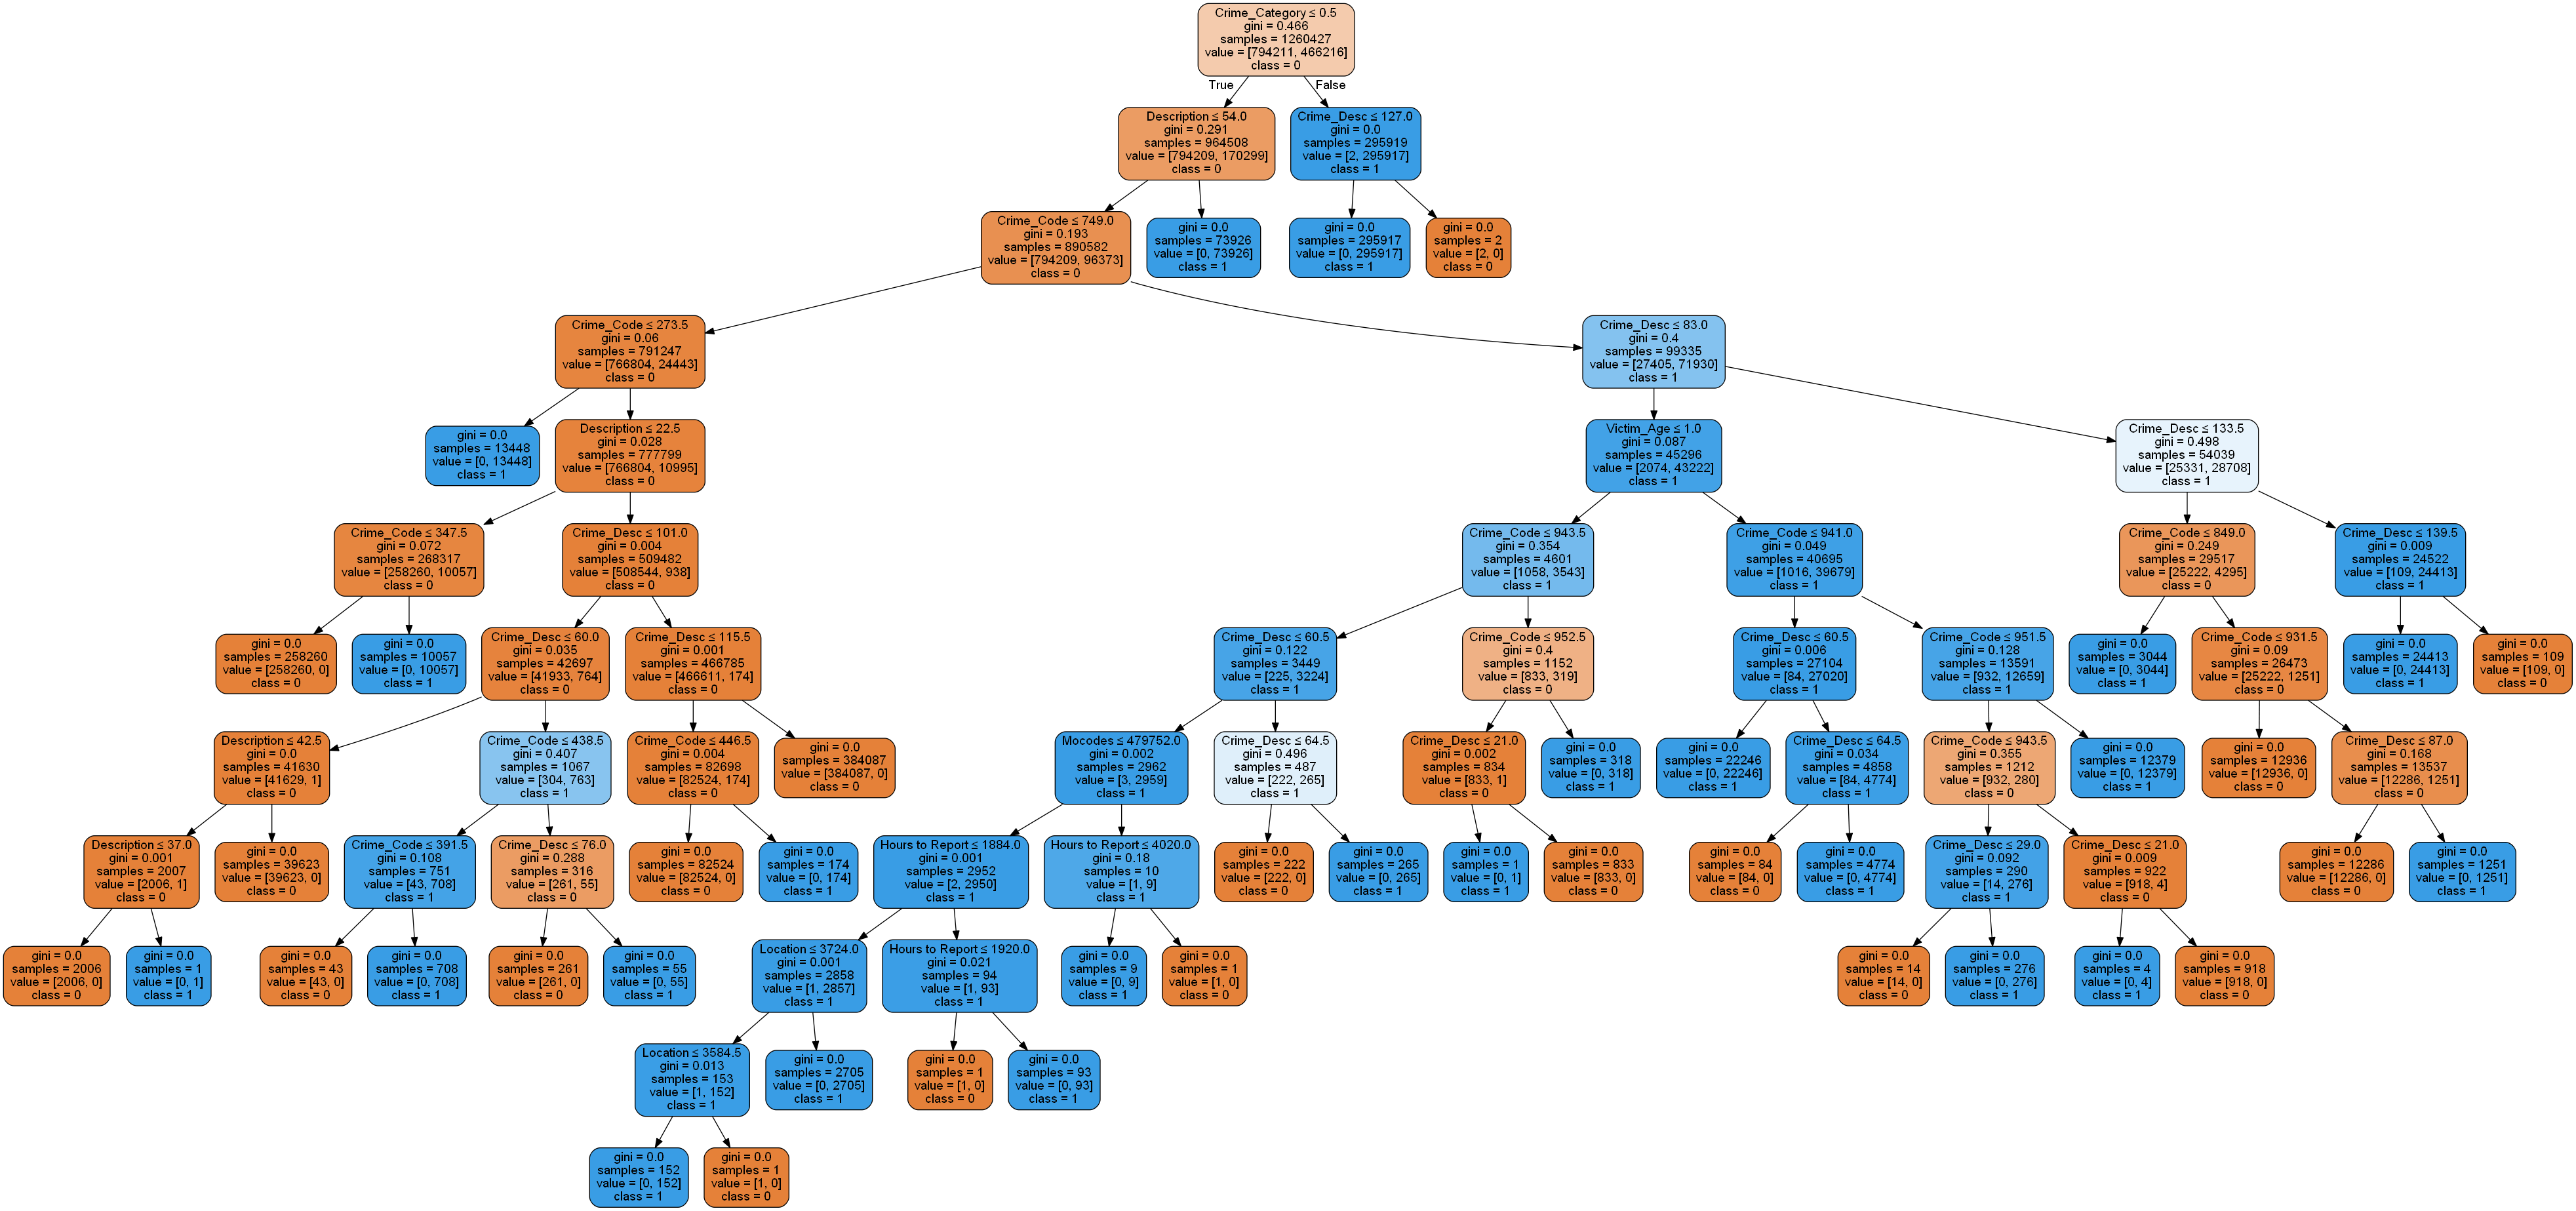

In [128]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CrimePrediction.png')
Image(graph.create_png())

In [129]:
# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))
print("Accuracy:",accuracy_score(y_pred2,y_test2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))

[[198529      1]
 [     2 116575]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198530
           1       1.00      1.00      1.00    116577

   micro avg       1.00      1.00      1.00    315107
   macro avg       1.00      1.00      1.00    315107
weighted avg       1.00      1.00      1.00    315107

Accuracy: 0.9999904794244495
Precision: 0.9999914219050233
Recall: 0.9999828439572128


## Decision Tree III - Alternate Model 

In [130]:
## The line / mo
feature_cols2 = ['Time_Occured','Area_Name','Mocodes','Victim_Age','Victim_Descent',
                'Description','Week_Day','Month','Day','Hours to Report',
                'Crime_Code','Crime_Desc','Premesis_Desc','Weapon_Desc','Location','Primary_Category']
target_cols2= ['Crime_Category']

In [131]:
X3 = df2[feature_cols2] # Features
#y2 = df3.Crime_Category # Target variable
y3 = df2[target_cols2]

In [132]:
# Split dataset into training set and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1) # 70% training and 30% test

In [133]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf2.predict(X_test3)

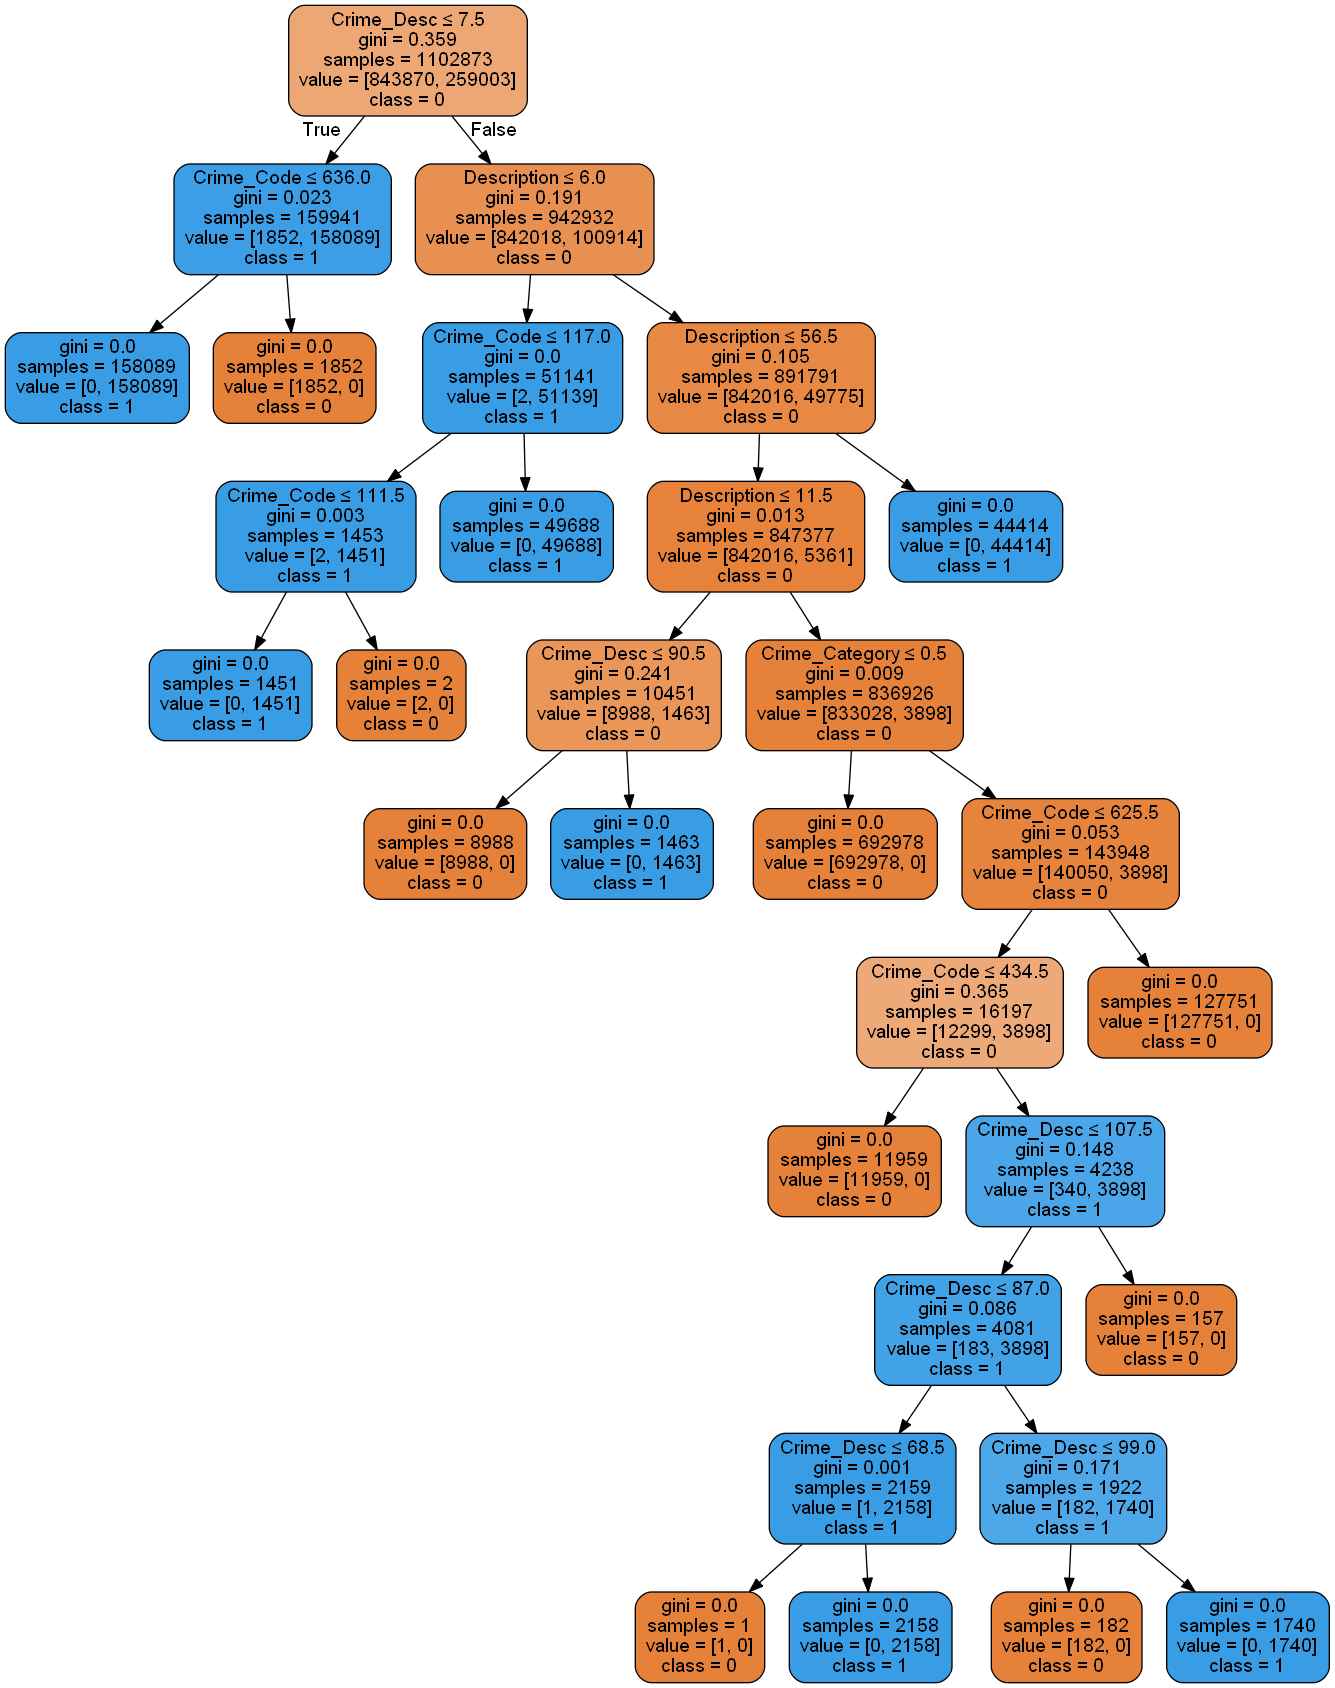

In [134]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Crimeprediction2.png')
Image(graph.create_png())

In [135]:
# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))
print("Accuracy:",accuracy_score(y_pred3,y_test3))
print("Precision:",metrics.precision_score(y_test3, y_pred3))
print("Recall:",metrics.recall_score(y_test3, y_pred3))

[[361594      0]
 [     0 111067]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    361594
           1       1.00      1.00      1.00    111067

   micro avg       1.00      1.00      1.00    472661
   macro avg       1.00      1.00      1.00    472661
weighted avg       1.00      1.00      1.00    472661

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# Create Batch files of dataset for uploading to GitHub

import pandas as pd
chunk_size = 150000
batch_no = 1

for chunk in pd.read_csv('C:/Users/Home/Desktop/MSDS692 - Data Science Practicum/LAPD-Crime-Stats-2010-2020-raw.csv', 
                         low_memory=False, chunksize=chunk_size):
    chunk.to_csv('LAPD-CrimeStats_2010-2020' + str(batch_no) + '.csv', index=False,)
    batch_no +=1

### Final Model Comparison 

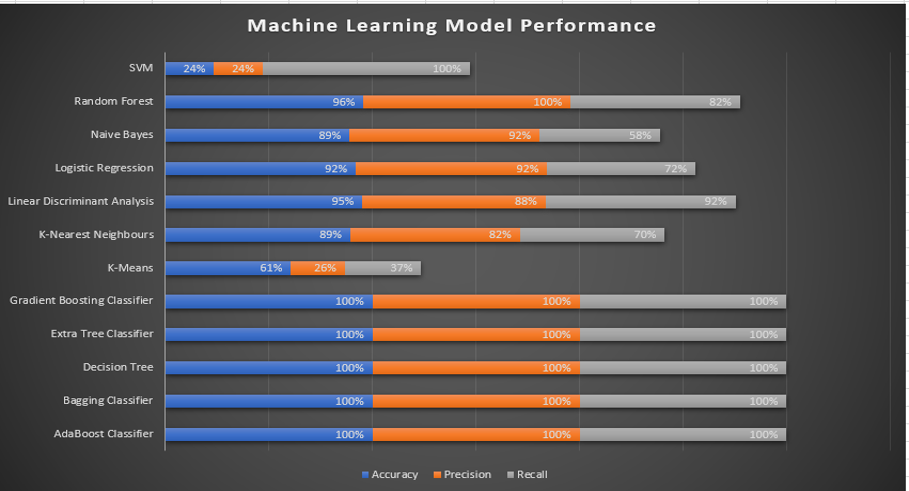

### References 

In [ ]:
Chen, D. Y. (2018). Pandas for everyone: Python data analysis. Boston: Addison-Wesley.

Chopra, R., England, A., & Alaudeen, M. N. (2019). Data science with Python: combine Python with machine learning principles to discover hidden patterns in raw data. Birmingham, UK: Packt Publishing.

Klosterman, S. (2019). Data science projects with Python: a case study approach to successful data science projects using Python, pandas, and scikit-learn. Birmingham: Packt.

McKinney, W. (2018). Python for data analysis: data wrangling with pandas, NumPy, and IPython. Sebastopol, CA: OReilly Media, Inc.

Döbler Mario, & Grössmann Tim. (2019). Data visualization with Python: create an impact with meaningful data insights using interactive and engaging visuals. Birmingham, UK: Packt Publishing.


### ShapeFiles